#1. Introduction

This dataset comes from [Kaggle](https://www.kaggle.com/akhilv11/border-crossing-entry-data), but the data was originally collected by the United States Bureau of Transportation Statistics. The data provide information on the number of inbound US border crossings in each type of conveyance (i.e., truck, train, pedestrian, etc.), for all 116 ports of entry in US states that share a border with either Mexico or Canada. Data for all 4 states that border Mexico and 11 of the 13 states that border Canada are included in the dataset, which covers all years from 1996 to 2019.

Border crossing in the US is an incendiary topic in current politics, as various actors claim that border crossing has increased in recent years, while others claim the opposite. Notably, the current US President, Donald Trump, campaigned on the promise to construct a [wall](https://www.nytimes.com/2019/09/18/us/politics/trump-border-wall.html) at the US-Mexico border to keep Mexicans and Central Americans from entering the country illegally. He has also [insulted](https://time.com/4473972/donald-trump-&/) Mexican-American immigrants, Mexicans, and the country of Mexico numerous times throughout his campaign and subsequent presidency. 

Moreover, the large amount of shootings that have been occurring in the US prompted Venezuela and Uruguay to issue travel [advisories](https://www.cnn.com/2019/08/06/americas/venezuela-uruguay-travel-warnings-us/index.html), warning their citizens to avoid traveling to the US, if possible.

Considering President Trump’s rhetoric and the existence of concerns about traveling to the US, it would be interesting to examine the inbound US border crossing data from several years before President Trump took office, compared to the present day, in order to see what trends there may be.


#2. Research Question & Hypotheses

***Research Question***

Is there a significant difference in inbound US border crossings between 2012 (the year President Obama was re-elected)  and 2018 (about half of the way through President Trump’s time in office)?

***Hypotheses***

**Hypothesis 1:**

Ho: There is no significant difference in overall inbound US border crossings from 2012 to 2018.

Ha: There is a significant difference in overall inbound US border crossings from 2012 to 2018.

**Hypothesis 2:**

Ho: There is no significant difference in inbound US-Mexico border crossings between 2012 and 2018.

Ha: There is a significant difference in inbound US-Mexico border crossings from 2012 to 2018.

**Hypothesis 3:**

Ho: There is no significant difference in inbound US-Canada border crossings from 2012 to 2018.

Ha: There is a significant difference in inbound US-Canada border crossings from 2012 to 2018.

**Hypothesis 4:**

Ho: There is no significant difference in inbound US border crossings between the US-Mexico and US-Canada borders.

Ha: There is a significant difference in inbound US border crossings between the US-Mexico and US-Canada borders.

#3. Data

The dataset is a CSV file downloaded from Kaggle and contains a total of 346,733 observations and 8 columns. There are no null values. 116 unique ports of entry are represented, with 80,546 records from the US-Mexico border and 266,187 records from the US-Canada border.

In [1]:
import pandas as pd
import numpy as np
import math
import io
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
!pip install scikit_posthocs
import scikit_posthocs as sp
!pip install us
import us
from scipy.stats import norm

     |████████████████████████████████| 132 kB 4.3 MB/s eta 0:00:01
  Created wheel for us: filename=us-1.0.0-py3-none-any.whl size=11833 sha256=7f75e735fb05777d163431d778849bcf0dea4c9af16824b58398960b5cf34df0
  Stored in directory: /Users/Heather/Library/Caches/pip/wheels/bd/9d/79/693961c74f34b952e545efbf3399533619c0874440a86ca466
  Created wheel for jellyfish: filename=jellyfish-0.5.6-cp37-cp37m-macosx_10_9_x86_64.whl size=22561 sha256=4cb4214e6fa8a11f06deb81db416893f58eaf76cc55843ba39b6e8a36a00a2e9
  Stored in directory: /Users/Heather/Library/Caches/pip/wheels/a2/e1/cf/61dcdba1d8dfafe32a1befc0525f388d681612a72cccd353eb
Successfully built us jellyfish


In [3]:
with open('./Border_Crossing_Entry_Data.csv') as f:
    crossings = pd.read_csv(f)

In [4]:
crossings.info()
crossings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [74]:
crossings.columns = crossings.columns.str.lower()
crossings['border'].value_counts()    #Here's how many records there are for each border.

US-Canada Border    266187
US-Mexico Border     80546
Name: border, dtype: int64

In [75]:
print(crossings['port name'].nunique())   #There are 116 ports
print(crossings['state'].value_counts())

116
North Dakota    57071
Washington      44677
Montana         38154
Maine           38136
Texas           35754
Minnesota       23135
New York        20697
Arizona         19252
California      19102
Vermont         16247
Alaska          11529
Michigan         9985
Idaho            6551
New Mexico       6438
Ohio                5
Name: state, dtype: int64


In [76]:
#I need to make a new column - 'year' - that holds just the year value from each date
crossings['year'] = pd.DatetimeIndex(crossings['date']).year
print(crossings.year.unique())

[2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006
 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996]


In [77]:
#I also want to do the same for month
crossings['month'] = pd.DatetimeIndex(crossings['date']).month
print(crossings.month.unique())

[ 3  2  1 12 11 10  9  8  7  6  5  4]


In [0]:
#I'm adding a column with state abbreviations too, because that will look better in visualizations:
for index, row in crossings.iterrows():
  state_info = us.states.lookup(row['state'])
  state_abbr = state_info.abbr
  crossings.at[index, 'state_abbr'] = state_abbr

In [79]:
crossings.tail()

,port name,state,port code,border,date,measure,value,location,year,month,state_abbr
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1,VT
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1,NM
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996,1,ND
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1,CA
346732,Presidio,Texas,2403,US-Mexico Border,01/01/1996 12:00:00 AM,Trucks,347,POINT (-104.39000000000001 29.56),1996,1,TX


In [80]:
print(crossings['measure'].unique())      #All the types of conveyances included

['Trucks' 'Rail Containers Full' 'Trains' 'Personal Vehicle Passengers'
 'Bus Passengers' 'Truck Containers Empty' 'Rail Containers Empty'
 'Personal Vehicles' 'Buses' 'Truck Containers Full' 'Pedestrians'
 'Train Passengers']


#4. Methods

For this analysis, I'm going to create a dataframe called people_crossing that just includes the conveyances that count people - Personal Vehicle Passengers, Bus Passengers, Pedestrians, and Train Passengers. The other types (e.g., Rail Containers Full, Trucks, etc.) are a measure of how many of those types of conveyances crossed the border, but they aren't counting the people in them. I want to make sure I'm only looking at individuals who crossed the border, not freight containers.

Then, I will run some descriptive statistics on the people_crossing dataset as a whole, to see what we're dealing with. After that, I will move into inferential statistics and test the four hypotheses that were laid out earlier. All relevant tests will be conducted at the 95% confidence interval.

For the first hypothesis (whether or not there is a significant difference between inbound border crossings in 2012 and 2018), I will first check if the 'value' variable is normal. If it is, I'll run a t-test, and if not, I'll use the Mann-Whitney U to test the means or medians of the 'value' variable (number of crossings) between 2012 and 2018. From there, I will test for differences among the number of people who crossed in each conveyance type, and among each state's number of crossings, from 2012 to 2018. To do this, I'll separate people_crossing into 4 separate datasets - one for each type of conveyance in the year 2012. I'll then use either the independent t-test or the Mann-Whitney U to test the median amount of crossings for each conveyance type between 2012 and 2018 Then, I'll do the same for states.

For the second and third hypotheses, I will proceed in exactly the same way. For the second hypothesis, I will separate all US-Mexico records off of the original people_crossing dataset Likewise, for the third hypothesis, I will be dealing only with the US-Canada border crossings. Then, when it is time to look specifically at conveyances, rather than testing again for differences in conveyance types between 2012 and 2018, I will look within 2012 and within 2018, respectively, using an ANOVA test (either parametric or non-parametric) to see if the usage of any one conveyance type is significantly different from the other conveyance types used in a specific year. 

Supposing the chosen ANOVA test comes out significant, I'll then use either the Tukey HSD (if parametric) or Dunn's test (if non-paramentric) as a post-hoc test to determine which sample(s) stand out from the others. I will not do this with states, since I already tested for differences between states as a part of the first hypothesis.

For the fourth hypothesis, I will use either a t-test or a Mann-Whitney U test to determine if there is a significant difference between the amount of border crossings that occur at the US-Mexico border vs. the US-Canada border. I will run two tests - one for 2012 and one for 2018. Following these tests, I will make lineplots that depict the rate of border crossings by month for the US-Canada and US-Mexico borders, to better visualize the comparison between them.


In [81]:
#Now I'm going to separate out just the conveyance types that count people.
people_crossing = crossings[
                            (crossings.measure == 'Personal Vehicle Passengers') | 
                            (crossings.measure == 'Bus Passengers') | 
                            (crossings.measure == 'Pedestrians') |
                            (crossings.measure == 'Train Passengers')]
print(people_crossing['border'].value_counts())   #Number of records in the dataset for each border.

US-Canada Border    88251
US-Mexico Border    27085
Name: border, dtype: int64


In [82]:
#Now let's see how many actual people crossed each border:
print(people_crossing[(people_crossing['border'] == 'US-Canada Border')].value.sum())
print(people_crossing[(people_crossing['border'] == 'US-Mexico Border')].value.sum())

1631864476
5018273234


So it's noteworthy that, while the Canadian border has a larger amount of records pertaining to it, a much larger number of *people* actually crossed the US-Mexico border. What I think this means is that much larger groups at a time are crossing the US-Mexico border, while the US-Canada border sees a numerous amount of crossings with perhaps just one or two people involved.

#A. Descriptive Statistics

In this section, I will visualize the relationships between 1) year and number of crossings, 2) month and number of crossings, 3) state and number of crossings, and 4) conveyance type and number of crossings. 

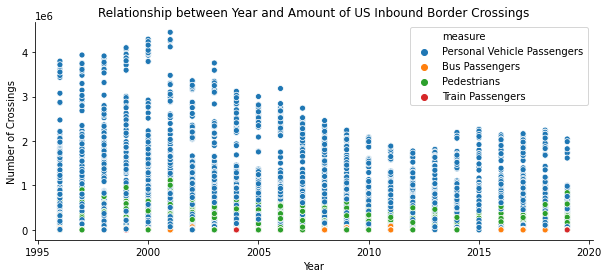

(-0.030257177883876822, 8.86116362472006e-25)

In [83]:
#Let's look at the number of border crossings over the years, to begin with:
plt.figure(figsize=(10,4))
sns.scatterplot(x='year', y='value', hue='measure', data=people_crossing)
plt.xlabel('Year')
plt.ylabel('Number of Crossings')
plt.title('Relationship between Year and Amount of US Inbound Border Crossings')
sns.despine()
plt.show()
#And we'll test for a correlation, just to see what it is:
stats.pearsonr(people_crossing['year'], people_crossing['value'])
#Okay, there's basically no correlation between year & amount of crossings

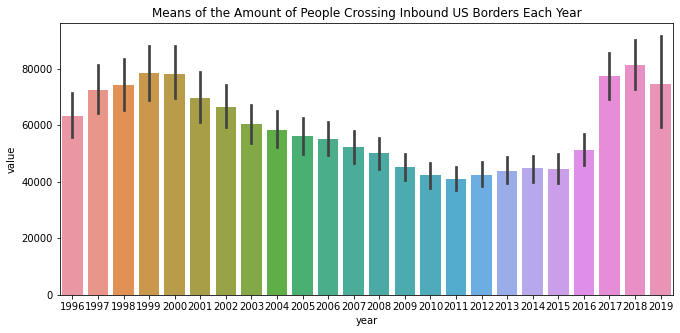

In [84]:
#Perhaps this could be more effectively shown as a bar chart:
plt.figure(figsize=(11,5))
sns.barplot('year', 'value', data=people_crossing)
plt.title('Means of the Amount of People Crossing Inbound US Borders Each Year')
plt.show()

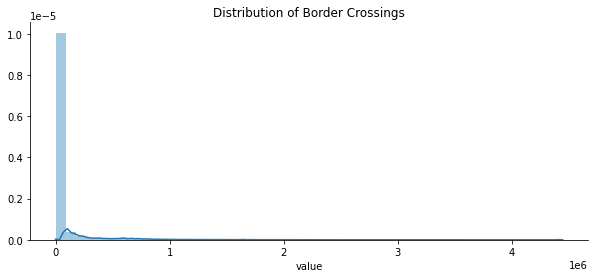

DescribeResult(nobs=115336, minmax=(0, 4447374), mean=57658.82040299646, variance=56069752944.55064, skewness=7.707377686432746, kurtosis=79.12309380428306)


In [85]:
#Let's check what the distribution of the amount of crossings is:
plt.figure(figsize=(10,4))
sns.distplot(people_crossing['value'])
plt.title('Distribution of Border Crossings')
sns.despine()
plt.show()
print(stats.describe(people_crossing['value']))
#It's not normal. In fact, it looks exponential.

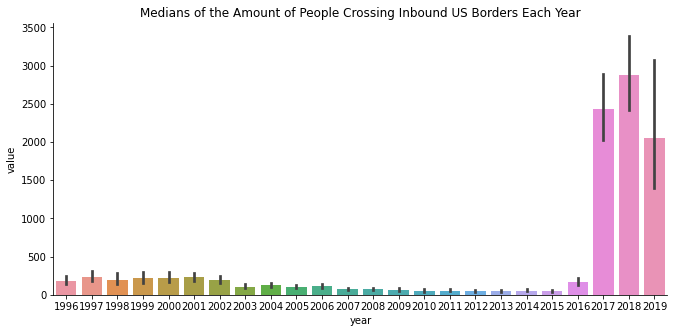

In [86]:
#So really, a bar chart using medians as the estimator would be a more accurate measure:
from numpy import median
plt.figure(figsize=(11,5))
sns.barplot('year', 'value', data=people_crossing, estimator=median)
plt.title('Medians of the Amount of People Crossing Inbound US Borders Each Year')
sns.despine()
plt.show()
#Here the spike in crossings from 2017-2019 is even more obvious.

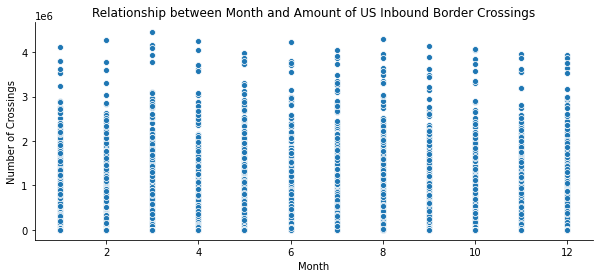

In [87]:
#Now let's look at month & number of crossings:
plt.figure(figsize=(10,4))
sns.scatterplot(x='month', y='value', data=people_crossing)
plt.xlabel('Month')
plt.ylabel('Number of Crossings')
plt.title('Relationship between Month and Amount of US Inbound Border Crossings')
sns.despine()
plt.show()
#There's definitely no correlation here.

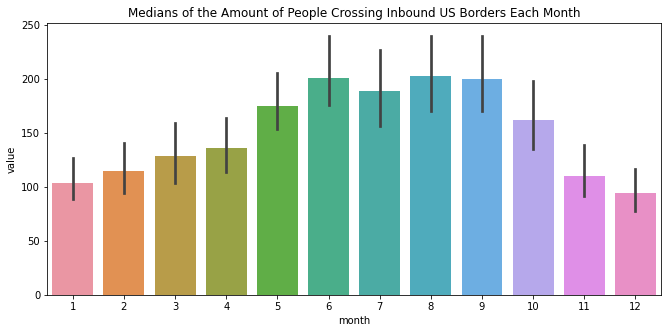

DescribeResult(nobs=115336, minmax=(1, 12), mean=6.451628286051189, variance=11.940036712254562, skewness=0.017309952730337416, kurtosis=-1.21889650262127)


In [88]:
#Let's plot the medians in a bar chart:
plt.figure(figsize=(11,5))
sns.barplot('month', 'value', data=people_crossing, estimator=median)
plt.title('Medians of the Amount of People Crossing Inbound US Borders Each Month')
plt.show()
print(stats.describe(people_crossing['month']))
#Okay, there's bit of a peak in the summer, that was somewhat expected.
#Additionally, this looks pretty normal.

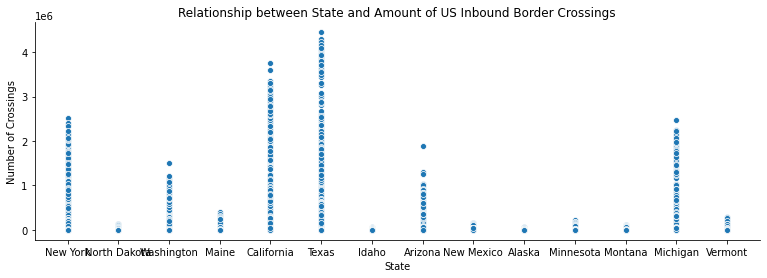

In [89]:
#Now let's see what's going on with states and the amount of crossings in each:
plt.figure(figsize=(13,4))
sns.scatterplot(x='state', y='value', data=people_crossing)
plt.xlabel('State')
plt.ylabel('Number of Crossings')
plt.title('Relationship between State and Amount of US Inbound Border Crossings')
sns.despine()
plt.show()
#Texas and California see the most border crossings, followed by New York and Michigan.

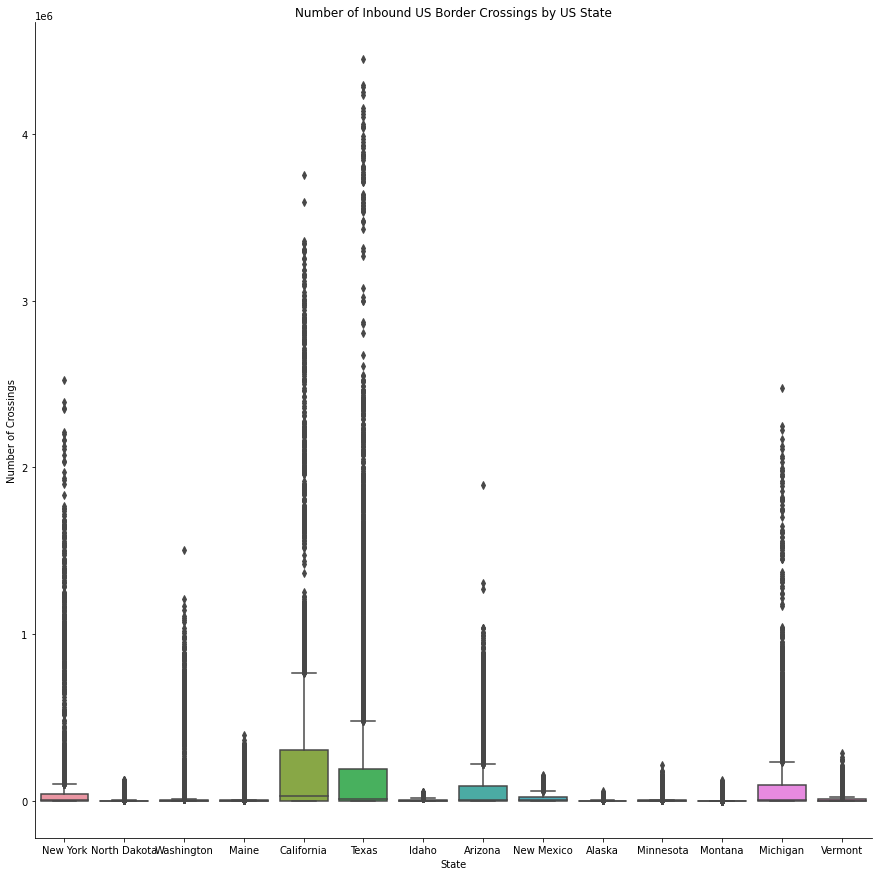

In [90]:
#We should be able to see measures of central tendency better with a boxplot:
plt.figure(figsize=(15,15))
state_crossings_bp = sns.boxplot(y="value", x="state", data=people_crossing)
plt.xlabel("State")
plt.ylabel("Number of Crossings")
plt.title("Number of Inbound US Border Crossings by US State")
sns.despine()
plt.show(state_crossings_bp)
#Wow, there's a ton of high outliers. This boxplot wasn't highly useful for central tendency after all,
#so I think I may stick to other types of figures.

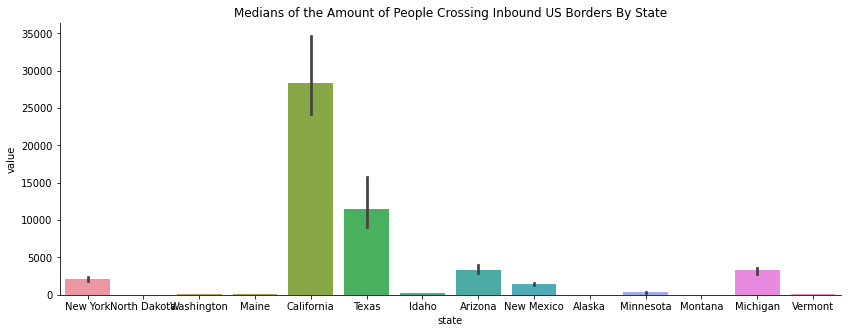

In [91]:
#Now we'll plot medians for each state as a bar chart:
plt.figure(figsize=(14,5))
sns.barplot('state', 'value', data=people_crossing, estimator=median)
plt.title('Medians of the Amount of People Crossing Inbound US Borders By State')
sns.despine()
plt.show()
#As seen on the boxplot earlier, Texas has the most outliers, so it technically received more inbound visitors.
#But when looking at medians, California's is by far the highest.

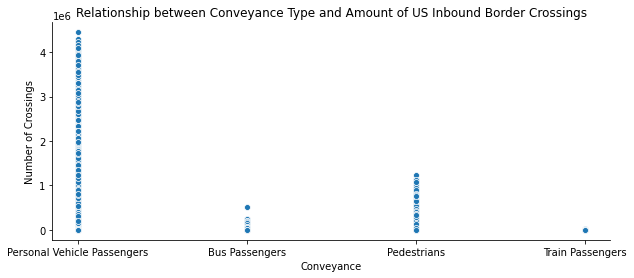

In [92]:
#Finally, we'll look at the relationship between conveyance type and number of crossings in each:
plt.figure(figsize=(10,4))
sns.scatterplot(x='measure', y='value', data=people_crossing)
plt.xlabel('Conveyance')
plt.ylabel('Number of Crossings')
plt.title('Relationship between Conveyance Type and Amount of US Inbound Border Crossings')
sns.despine()
plt.show()

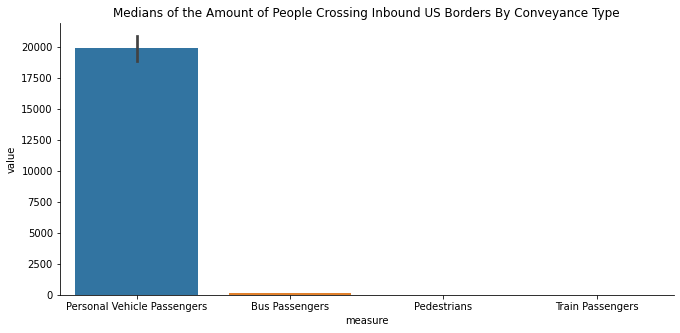

In [93]:
#Now here's a bar chart of the medians of conveyance types:
plt.figure(figsize=(11,5))
sns.barplot('measure', 'value', data=people_crossing, estimator=median)
plt.title('Medians of the Amount of People Crossing Inbound US Borders By Conveyance Type')
sns.despine()
plt.show()
#So Personal Vehical Passengers were the most common by far (also evident in the above scatterplot).

#B. Inferential Statistics

In this section, I will test the 3 hypotheses given in the introduction.

**Hypothesis 1:**

Ho: There is no significant difference in overall inbound US border crossings from 2012 to 2018.

Ha: There is a significant difference in overall inbound US border crossings from 2012 to 2018.

In [0]:
#First, I'll separate out datasets with 2012 values and 2018 values, using people_crossing as my
#original dataset, since I'm only interested in people, not counts of vehicles or freight.
crossing_2012 = people_crossing[people_crossing['year'] == 2012]
crossing_2018 = people_crossing[people_crossing['year'] == 2018]

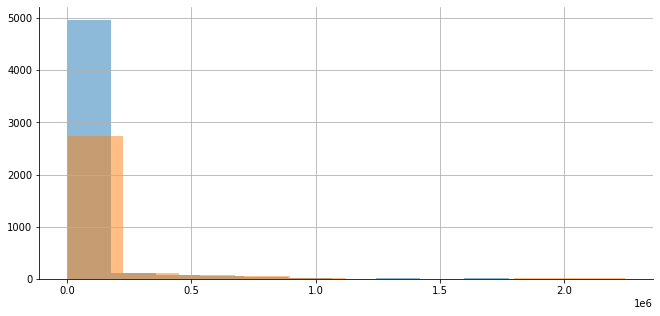

DescribeResult(nobs=5280, minmax=(0, 1775986), mean=42461.910037878784, variance=25235192416.058018, skewness=6.073557731843657, kurtosis=44.83119183553832)
DescribeResult(nobs=3040, minmax=(0, 2245201), mean=81232.2125, variance=58687307207.994316, skewness=5.124381627865733, kurtosis=32.18151055847187)


In [95]:
#Now I'll check normality for the number of crossings for these 2 years specifically, 
#first using histograms and measures of skewness & kurtosis:
plt.figure(figsize=(11,5))
crossing_2012.value.hist(alpha = .5)
crossing_2018.value.hist(alpha = .5)
sns.despine()
plt.show()
print(stats.describe(crossing_2012['value']))
print(stats.describe(crossing_2018['value']))

In [96]:
#Right, so they're definitely not normal. No need to conduct a Shapiro-Wilk test here.
#We'll test for a significant difference between the two years using the Mann-Whitney U test:
stats.mannwhitneyu(crossing_2012['value'], crossing_2018['value'])

MannwhitneyuResult(statistic=4759234.5, pvalue=1.4854702742915714e-214)

There is a significant difference between between the median amount of border crossings between 2012 and 2018 (p < .001). We can reject the null hypothesis.

Our next step is to write a function to calculate 95% confidence intervals for Mann Whitney U Tests (since we'll be using those almost exclusively throughout this analysis). We'll then use it to test the above Mann Whitney U, and we'll continue to use it throughout.

In [0]:
#First, here are some smaller functions we will call in our larger function for CIs:

#returns sum of relevant column in df:
def col_sum(values):
  result = values.sum()
  return result

#returns sum, median, and std deviation of relevant column in df:
def agg_stats(df_obj):
  return df_obj.agg([col_sum, median, np.std])   

In [98]:
#Okay, now I'll create a function that can calculate 95% CIs for all my Mann Whitney U tests:
def ci95_mwu (df_obj1, df_obj2):
  print('Dataframe 1 Aggregated Stats:')
  print(agg_stats(df_obj1))
  print('\n')
  print('Dataframe 2 Aggregated Stats:')
  print(agg_stats(df_obj2))
  med_diff = (df_obj1.median()) - (df_obj2.median())
  std_diff = (np.std(df_obj1)) - (np.std(df_obj2))
  sum_diff = (col_sum(df_obj1)) - (col_sum(df_obj2))
  print('Difference between Medians: ')
  print(med_diff)
  print('Difference between Standard Deviations: ')
  print(std_diff)
  print('Difference between Sums: ')
  print(sum_diff)
  ci95_hi = []
  ci95_lo = []
  ci95_hi.append(med_diff + 1.96 * std_diff / math.sqrt(abs(sum_diff)))
  ci95_lo.append(med_diff - 1.96 * std_diff / math.sqrt(abs(sum_diff)))
  print('95% Confidence Interval: ')
  return [ci95_hi, ci95_lo]
print(ci95_mwu(crossing_2012['value'], crossing_2018['value']))  

Dataframe 1 Aggregated Stats:
col_sum    2.241989e+08
median     5.350000e+01
std        1.588559e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    2.469459e+08
median     2.876500e+03
std        2.422546e+05
Name: value, dtype: float64
Difference between Medians: 
-2823.0
Difference between Standard Deviations: 
-83373.94340726142
Difference between Sums: 
-22747041
95% Confidence Interval: 
[[-2857.262887425092], [-2788.737112574908]]


So now that we have the CI, we'll recap:

There is a significant difference between the medians of the overall amount of inbound US border crossings in 2012 vs. 2018 (p < .001). We can reject the null hypothesis, as it's clear these samples did not come from the same distribution. 

At the 95% confidence level, the median difference between 2012 border crossings and the 2018 border crossings is between -2857 and -2789. 

That is, the median of 2012 border crossings is approximately 2857 to 2789 crossings lower than the median of 2018 border crossings.



Now, to further illustrate any key differences between 2012 and 2018 border crossings, I will test for differences among the number of people who crossed in each conveyance type, and among each state's number of crossings.

I will examine them in the following order:

1) 2012 conveyances

2) 2018 conveyances

3) 2012 states

4) 2018 states

In [99]:
#I'll split off each of the conveyance types from 2012, so I can more easily test for
#significant differences between conveyance type.
bus_2012 = crossing_2012[(crossing_2012['measure'] == 'Bus Passengers')]
peds_2012 = crossing_2012[(crossing_2012['measure'] == 'Pedestrians')]
train_2012 = crossing_2012[(crossing_2012['measure'] == 'Train Passengers')]
pvp_2012 = crossing_2012[(crossing_2012['measure'] == 'Personal Vehicle Passengers')]

#Let's get a count of each type for 2012:
print(bus_2012.value.sum())
print(peds_2012.value.sum())
print(train_2012.value.sum())
print(pvp_2012.value.sum())

5302245
41566510
272367
177057763


In [100]:
#Now we will do the same thing regarding 2018 conveyances, in the overall dataset.
bus_2018 = crossing_2018[(crossing_2018['measure'] == 'Bus Passengers')]
peds_2018 = crossing_2018[(crossing_2018['measure'] == 'Pedestrians')]
train_2018 = crossing_2018[(crossing_2018['measure'] == 'Train Passengers')]
pvp_2018 = crossing_2018[(crossing_2018['measure'] == 'Personal Vehicle Passengers')]

#Let's get a count of each type for 2018:
print(bus_2018.value.sum())
print(peds_2018.value.sum())
print(train_2018.value.sum())
print(pvp_2018.value.sum())


3633900
46660171
299753
196352102


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

<Figure size 720x288 with 0 Axes>

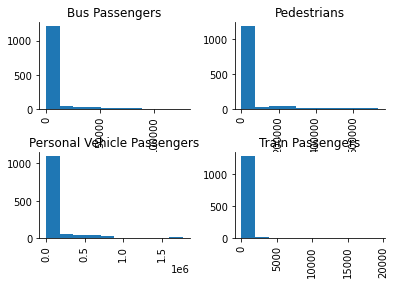

DescribeResult(nobs=5280, minmax=(False, True), mean=0.25, variance=0.18753551809054744, skewness=1.1547005383792515, kurtosis=-0.6666666666666665)
DescribeResult(nobs=5280, minmax=(False, True), mean=0.25, variance=0.18753551809054744, skewness=1.1547005383792515, kurtosis=-0.6666666666666665)
DescribeResult(nobs=5280, minmax=(False, True), mean=0.25, variance=0.18753551809054744, skewness=1.1547005383792515, kurtosis=-0.6666666666666665)
DescribeResult(nobs=5280, minmax=(False, True), mean=0.25, variance=0.18753551809054744, skewness=1.1547005383792515, kurtosis=-0.6666666666666665)


In [101]:
#Let's check each of the conveyance samples for normality:
plt.figure(figsize=(10,4))
crossing_2012.value.hist(by = crossing_2012.measure)
sns.despine()
plt.show()
print(stats.describe(crossing_2012['measure'] == 'Bus Passengers'))
print(stats.describe(crossing_2012['measure'] == 'Pedestrians'))
print(stats.describe(crossing_2012['measure'] == 'Train Passengers'))
print(stats.describe(crossing_2012['measure'] == 'Personal Vehicle Passengers'))
#None are normal.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

<Figure size 720x288 with 0 Axes>

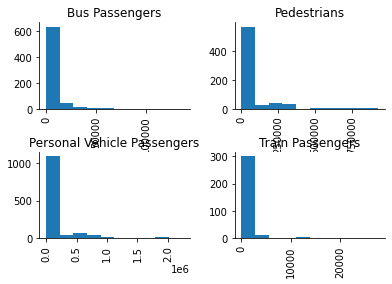

DescribeResult(nobs=3040, minmax=(False, True), mean=0.23651315789473684, variance=0.18063410315027453, skewness=1.2401108188085292, kurtosis=-0.46212515707403945)
DescribeResult(nobs=3040, minmax=(False, True), mean=0.2292763157894737, variance=0.17676683379227928, skewness=1.2880339120962858, kurtosis=-0.3409686412899373)
DescribeResult(nobs=3040, minmax=(False, True), mean=0.10657894736842105, variance=0.09525120798046449, skewness=2.5499037486616385, kurtosis=4.502009127438679)
DescribeResult(nobs=3040, minmax=(False, True), mean=0.4276315789473684, variance=0.24484335221073422, skewness=0.29255422615841276, kurtosis=-1.9144120247568528)


In [102]:
#Now for 2018, though it's almost assuredly non-normal:
plt.figure(figsize=(10,4))
crossing_2018.value.hist(by = crossing_2018.measure)
sns.despine()
plt.show()
print(stats.describe(crossing_2018['measure'] == 'Bus Passengers'))
print(stats.describe(crossing_2018['measure'] == 'Pedestrians'))
print(stats.describe(crossing_2018['measure'] == 'Train Passengers'))
print(stats.describe(crossing_2018['measure'] == 'Personal Vehicle Passengers'))
#None are normal. This is very similar to the 2012 distributions.

In [103]:
#So, since our distributions are non-normal,
#we'll test for a significant difference between conveyance types using Mann-Whitney U:
stats.mannwhitneyu(bus_2012['value'], bus_2018['value'])

MannwhitneyuResult(statistic=287347.5, pvalue=2.0469410214093583e-50)

In [104]:
#Now getting the CI:
print(ci95_mwu(bus_2012['value'], bus_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    5.302245e+06
median     4.800000e+01
std        1.249193e+04
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    3.633900e+06
median     4.720000e+02
std        1.263627e+04
Name: value, dtype: float64
Difference between Medians: 
-424.0
Difference between Standard Deviations: 
-140.28754592183031
Difference between Sums: 
1668345
95% Confidence Interval: 
[[-424.21287872351473], [-423.78712127648527]]


There is a significant difference between bus crossings in 2012 and in 2018 (p < .001). We can reject the null hypothesis. 

At the 95% confidence level, the median difference between 2012 bus crossings and 2018 bus crossings is between -424.21 and -424.79.

That is, the median of 2012 bus crossings in between 424.21 and 424.79 crossings lower than the median of 2018 bus crossings.

In [105]:
#Now for pedestrians:
stats.mannwhitneyu(peds_2012['value'], peds_2018['value'])

MannwhitneyuResult(statistic=238761.0, pvalue=4.0653118963651705e-73)

In [106]:
#Getting 95% CI:
print(ci95_mwu(peds_2012['value'], peds_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    4.156651e+07
median     3.000000e+00
std        1.014929e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    4.666017e+07
median     8.770000e+02
std        1.490064e+05
Name: value, dtype: float64
Difference between Medians: 
-874.0
Difference between Standard Deviations: 
-47445.05669451265
Difference between Sums: 
-5093661
95% Confidence Interval: 
[[-915.2033020870961], [-832.7966979129039]]


There is a significant difference between pedestrian crossings in 2012 and in 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between pedestrian crossings in 2012 and pedestrian crossings in 2018 is between -915 and -833. 

That is, pedestrian crossings in 2012 are between 915 and 833 crossings lower than in 2018.

In [107]:
#Now for train passengers:
stats.mannwhitneyu(train_2012['value'], train_2018['value'])

MannwhitneyuResult(statistic=53814.0, pvalue=4.6942352528922135e-124)

In [108]:
#Getting 95% CI:
print(ci95_mwu(train_2012['value'], train_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    272367.000000
median          0.000000
std          1198.379446
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    299753.000000
median         92.000000
std          3106.213516
Name: value, dtype: float64
Difference between Medians: 
-92.0
Difference between Standard Deviations: 
-1903.490844417523
Difference between Sums: 
-27386
95% Confidence Interval: 
[[-114.5446014274683], [-69.4553985725317]]


There is a significant difference between crossings by train in 2012 and in 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between train crossings in 2012 and train crossings in 2018 is between -115 and -69.

That is, train crossings in 2012 are between 115 and 69 crossings lower than in 2018.

In [109]:
#Finally for personal vehicle passengers:
stats.mannwhitneyu(pvp_2012['value'], pvp_2018['value'])

MannwhitneyuResult(statistic=838610.5, pvalue=0.15829092052948274)

In [110]:
#Getting 95% CI:
print(ci95_mwu(pvp_2012['value'], pvp_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    1.770578e+08
median     2.012600e+04
std        2.806120e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    1.963521e+08
median     1.571100e+04
std        3.398596e+05
Name: value, dtype: float64
Difference between Medians: 
4415.0
Difference between Standard Deviations: 
-59223.14099479694
Difference between Sums: 
-19294339
95% Confidence Interval: 
[[4388.573931516098], [4441.426068483902]]


There is not a significant difference between personal vehicle passenger crossings in 2012 and in 2018. We'll fail to reject the null hypothesis.

However, at the 95% confidence level, the median difference between pvp crossings in 2012 and pvp crossings in 2018 is between 4389 and 4441.

That is, pvp crossings in 2012 are between 4389 and 4441 crossings higher than in 2018.

---------------------------
Now we'll move on to testing for differences between **states** in 2012 vs. 2018.
We're going to continue with the knowledge that all variables in the dataset are non-normal, so we won't be testing for normality again.

In [111]:
#Starting with splitting off 2012 states:
alaska_2012 = crossing_2012[(crossing_2012['state'] == 'Alaska')]
arizona_2012 = crossing_2012[(crossing_2012['state'] == 'Arizona')]
california_2012 = crossing_2012[(crossing_2012['state'] == 'California')]
idaho_2012 = crossing_2012[(crossing_2012['state'] == 'Idaho')]
maine_2012 = crossing_2012[(crossing_2012['state'] == 'Maine')]
michigan_2012 = crossing_2012[(crossing_2012['state'] == 'Michigan')]
minnesota_2012 = crossing_2012[(crossing_2012['state'] == 'Minnesota')]
montana_2012 = crossing_2012[(crossing_2012['state'] == 'Montana')]
new_mexico_2012 = crossing_2012[(crossing_2012['state'] == 'New Mexico')]
new_york_2012 = crossing_2012[(crossing_2012['state'] == 'New York')]
north_dakota_2012 = crossing_2012[(crossing_2012['state'] == 'North Dakota')]
texas_2012 = crossing_2012[(crossing_2012['state'] == 'Texas')]
vermont_2012 = crossing_2012[(crossing_2012['state'] == 'Vermont')]
washington_2012 = crossing_2012[(crossing_2012['state'] == 'Washington')]

#counts for each:
print('Alaska 2012: ', alaska_2012.value.sum())
print('Arizona 2012: ', arizona_2012.value.sum())
print('California 2012: ', california_2012.value.sum())
print('Idaho 2012: ', idaho_2012.value.sum()) 
print('Maine 2012: ', maine_2012.value.sum())
print('Michigan 2012: ', michigan_2012.value.sum())
print('Minnesota 2012: ', minnesota_2012.value.sum())
print('Montana 2012: ', montana_2012.value.sum())
print('New Mexico 2012: ', new_mexico_2012.value.sum())
print('New York 2012: ', new_york_2012.value.sum())
print('North Dakota 2012: ', north_dakota_2012.value.sum())
print('Texas 2012: ', texas_2012.value.sum())
print('Vermont 2012: ', vermont_2012.value.sum())
print('Washington 2012: ', washington_2012.value.sum())

Alaska 2012:  475967
Arizona 2012:  21248852
California 2012:  63078793
Idaho 2012:  525697
Maine 2012:  4999254
Michigan 2012:  13524726
Minnesota 2012:  2117841
Montana 2012:  1329780
New Mexico 2012:  1835195
New York 2012:  21501579
North Dakota 2012:  1785340
Texas 2012:  72898341
Vermont 2012:  2909013
Washington 2012:  15968507


In [112]:
#And splitting off the 2018 states:
alaska_2018 = crossing_2018[(crossing_2018['state'] == 'Alaska')]
arizona_2018 = crossing_2018[(crossing_2018['state'] == 'Arizona')]
california_2018 = crossing_2018[(crossing_2018['state'] == 'California')]
idaho_2018 = crossing_2018[(crossing_2018['state'] == 'Idaho')]
maine_2018 = crossing_2018[(crossing_2018['state'] == 'Maine')]
michigan_2018 = crossing_2018[(crossing_2018['state'] == 'Michigan')]
minnesota_2018 = crossing_2018[(crossing_2018['state'] == 'Minnesota')]
montana_2018 = crossing_2018[(crossing_2018['state'] == 'Montana')]
new_mexico_2018 = crossing_2018[(crossing_2018['state'] == 'New Mexico')]
new_york_2018 = crossing_2018[(crossing_2018['state'] == 'New York')]
north_dakota_2018 = crossing_2018[(crossing_2018['state'] == 'North Dakota')]
texas_2018 = crossing_2018[(crossing_2018['state'] == 'Texas')]
vermont_2018 = crossing_2018[(crossing_2018['state'] == 'Vermont')]
washington_2018 = crossing_2018[(crossing_2018['state'] == 'Washington')]

#And counts for each:
print('Alaska 2018: ', alaska_2018.value.sum())
print('Arizona 2018: ', arizona_2018.value.sum())
print('California 2018: ', california_2018.value.sum())
print('Idaho 2018: ', idaho_2018.value.sum()) 
print('Maine 2018: ', maine_2018.value.sum())
print('Michigan 2018: ', michigan_2018.value.sum())
print('Minnesota 2018: ', minnesota_2018.value.sum())
print('Montana 2018: ', montana_2018.value.sum())
print('New Mexico 2018: ', new_mexico_2018.value.sum())
print('New York 2018: ', new_york_2018.value.sum())
print('North Dakota 2018: ', north_dakota_2018.value.sum())
print('Texas 2018: ', texas_2018.value.sum())
print('Vermont 2018: ', vermont_2018.value.sum())
print('Washington 2018: ', washington_2018.value.sum())

Alaska 2018:  601180
Arizona 2018:  25118397
California 2018:  77014963
Idaho 2018:  433728
Maine 2018:  3358350
Michigan 2018:  11242481
Minnesota 2018:  1763410
Montana 2018:  1176939
New Mexico 2018:  2376125
New York 2018:  17864580
North Dakota 2018:  1276743
Texas 2018:  88404201
Vermont 2018:  2492973
Washington 2018:  13821856


In [113]:
#Using Mann Whitney U, starting with Alaska:
stats.mannwhitneyu(alaska_2012['value'], alaska_2018['value'])

MannwhitneyuResult(statistic=5724.0, pvalue=7.18438214265437e-11)

In [114]:
#95% CI for Alaska:
print(ci95_mwu(alaska_2012['value'], alaska_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    475967.000000
median         13.000000
std          6668.745987
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    601180.000000
median        448.000000
std         11025.979537
Name: value, dtype: float64
Difference between Medians: 
-435.0
Difference between Standard Deviations: 
-4322.978531040053
Difference between Sums: 
-125213
95% Confidence Interval: 
[[-458.94497784665816], [-411.05502215334184]]


There is a significant difference between Alaska's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis here.

At the 95% confidence level, the median difference between crossings in Alaska in 2012 and in 2018 is between -459 and -411.

That is, Alaska's median crossings in 2012 are between 459 and 411 crossings lower than in 2018.

In [115]:
stats.mannwhitneyu(arizona_2012['value'], arizona_2018['value'])

MannwhitneyuResult(statistic=20390.0, pvalue=5.839717040162219e-10)

In [116]:
#95% CI for Arizona:
print(ci95_mwu(arizona_2012['value'], arizona_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    2.124885e+07
median     1.887500e+03
std        1.335642e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    2.511840e+07
median     1.517900e+04
std        1.800877e+05
Name: value, dtype: float64
Difference between Medians: 
-13291.5
Difference between Standard Deviations: 
-46322.15052589707
Difference between Sums: 
-3869545
95% Confidence Interval: 
[[-13337.654583270263], [-13245.345416729737]]


There is a significant difference between Arizona's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in Arizona in  2012 and in 2018 is between -13,338 and -13,245.

That is, Arizon'a median crossings in 2012 are between 13,338 and 13,245 crossings lower than in 2018.

In [117]:
stats.mannwhitneyu(california_2012['value'], california_2018['value'])

MannwhitneyuResult(statistic=21972.0, pvalue=1.1933919057559527e-08)

In [118]:
#95% CI for California:
print(ci95_mwu(california_2012['value'], california_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    6.307879e+07
median     3.377550e+04
std        3.827563e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    7.701496e+07
median     9.705800e+04
std        5.308159e+05
Name: value, dtype: float64
Difference between Medians: 
-63282.5
Difference between Standard Deviations: 
-147488.78547178302
Difference between Sums: 
-13936170
95% Confidence Interval: 
[[-63359.93607878043], [-63205.06392121957]]


There is a significant difference between California's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in California in 2012 and in 2018 is between -63,360 and -63,205.

That is, California's median crossings in 2012 are between 63,360 and 63,205 crossings lower than in 2018.

In [119]:
stats.mannwhitneyu(idaho_2012['value'], idaho_2018['value'])

MannwhitneyuResult(statistic=3353.5, pvalue=0.11885786247592184)

In [120]:
#Getting 95% CI for Idaho:
print(ci95_mwu(idaho_2012['value'], idaho_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    525697.000000
median        196.000000
std         10602.265489
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    433728.000000
median        210.000000
std          9580.695712
Name: value, dtype: float64
Difference between Medians: 
-14.0
Difference between Standard Deviations: 
1027.8179187897076
Difference between Sums: 
91969
95% Confidence Interval: 
[[-7.357194692029714], [-20.642805307970285]]


There is not a significant difference between Idaho's border crossings in 2012 and 2018. We'll fail to reject the null hypothesis.

However, at the 95% confidence level, the median difference between crossings in Idaho in 2012 and in 2018 is between -7.36 and -20.64.

That is, Idaho's median crossings in 2012 are between 7.36 and 20.64 crossings lower than in 2018.

In [121]:
stats.mannwhitneyu(maine_2012['value'], maine_2018['value'])

MannwhitneyuResult(statistic=60561.0, pvalue=2.0025373147986453e-15)

In [122]:
#95% CI for Maine:
print(ci95_mwu(maine_2012['value'], maine_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    4.999254e+06
median     3.250000e+01
std        2.520636e+04
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    3.358350e+06
median     3.530000e+02
std        2.080349e+04
Name: value, dtype: float64
Difference between Medians: 
-320.5
Difference between Standard Deviations: 
4410.058767274884
Difference between Sums: 
1640904
95% Confidence Interval: 
[[-313.7522519042111], [-327.2477480957889]]


There is a significant difference between Maine's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in Maine in 2012 and in 2018 is between -314 and -327.

That is, Maine's median border crossings in 2012 are between 314 and 327 crossings lower than in 2018.

In [123]:
stats.mannwhitneyu(michigan_2012['value'], michigan_2018['value'])

MannwhitneyuResult(statistic=6763.0, pvalue=0.029780053413714192)

In [124]:
#Getting 95% CI for Michigan:
print(ci95_mwu(michigan_2012['value'], michigan_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    1.352473e+07
median     2.545000e+03
std        1.848444e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    1.124248e+07
median     4.447000e+03
std        1.833698e+05
Name: value, dtype: float64
Difference between Medians: 
-1902.0
Difference between Standard Deviations: 
1674.748444202327
Difference between Sums: 
2282245
95% Confidence Interval: 
[[-1899.827176137152], [-1904.172823862848]]


There is a a significant difference between Michigan's amount of crossings in 2012 and 2018 (p < .05). 

At the 95% confidence level, the median difference between crossings in Michigan in 2012 and in 2018 is between -1900 and -1904.

That is, Michigan's median border crossings in 2012 are between 1900 and 1904 crossings lower than in 2018.

In [125]:
stats.mannwhitneyu(minnesota_2012['value'], minnesota_2018['value'])

MannwhitneyuResult(statistic=18981.5, pvalue=6.293169855127685e-13)

In [126]:
#95% Ci for Minnesota:
print(ci95_mwu(minnesota_2012['value'], minnesota_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    2.117841e+06
median     1.340000e+02
std        1.620283e+04
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    1.763410e+06
median     8.210000e+02
std        1.757953e+04
Name: value, dtype: float64
Difference between Medians: 
-687.0
Difference between Standard Deviations: 
-1352.197983722619
Difference between Sums: 
354431
95% Confidence Interval: 
[[-691.4517473140565], [-682.5482526859435]]


There is a significant difference between Minnesota's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in Minnesota in 2012 and in 2018 is between -691 and -683.

That is, Minnesota's median border crossings in 2012 are between 691 and 682 crossings lower than in 2018.


In [127]:
stats.mannwhitneyu(montana_2012['value'], montana_2018['value'])

MannwhitneyuResult(statistic=32674.0, pvalue=5.5194972212723396e-43)

In [128]:
#95% CI for Montana:
print(ci95_mwu(montana_2012['value'], montana_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    1.329780e+06
median     0.000000e+00
std        7.974960e+03
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    1.176939e+06
median     4.770000e+02
std        1.092931e+04
Name: value, dtype: float64
Difference between Medians: 
-477.0
Difference between Standard Deviations: 
-2938.4127605584526
Difference between Sums: 
152841
95% Confidence Interval: 
[[-491.7315667335425], [-462.2684332664575]]


There is a significant difference between Montana's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in Montana in 2012 and in 2018 is between -492 and -462.

That is, Montana's median border crossings in 2012 are between 492 and 462 crossings lower than in 2018.

In [129]:
stats.mannwhitneyu(new_mexico_2012['value'], new_mexico_2018['value'])

MannwhitneyuResult(statistic=2391.5, pvalue=0.0003186078761123579)

In [130]:
#95% CI for New Mexico:
print(ci95_mwu(new_mexico_2012['value'], new_mexico_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    1.835195e+06
median     4.073000e+03
std        2.633495e+04
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    2.376125e+06
median     1.936000e+04
std        3.674514e+04
Name: value, dtype: float64
Difference between Medians: 
-15287.0
Difference between Standard Deviations: 
-10291.641569448973
Difference between Sums: 
-540930
95% Confidence Interval: 
[[-15314.42648740847], [-15259.57351259153]]


There is a significant difference between New Mexico's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in New Mexico in 2012 and in 2018 is between -15,314 and -15,259.

That is, New Mexico's median border crossings in 2012 are between 15,314 and 15,259 crossings lower than in 2018.

In [131]:
stats.mannwhitneyu(new_york_2012['value'], new_york_2018['value'])

MannwhitneyuResult(statistic=23807.5, pvalue=5.424910879172281e-12)

In [132]:
#95% CI for New York:
print(ci95_mwu(new_york_2012['value'], new_york_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    2.150158e+07
median     5.430000e+02
std        2.109270e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    1.786458e+07
median     6.812000e+03
std        2.130597e+05
Name: value, dtype: float64
Difference between Medians: 
-6269.0
Difference between Standard Deviations: 
-1950.7298085278308
Difference between Sums: 
3636999
95% Confidence Interval: 
[[-6271.004848688958], [-6266.995151311042]]


There is a significant difference between New York's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in New York in 2012 and in 2018 is between -6271 and -6267.

That is, New York's median border crossings in 2012 are between 6271 and 6267 crossings lower than in 2018.

In [133]:
stats.mannwhitneyu(north_dakota_2012['value'], north_dakota_2018['value'])

MannwhitneyuResult(statistic=69050.5, pvalue=2.3878879161403424e-55)

In [134]:
#95% CI for North Dakota:
print(ci95_mwu(north_dakota_2012['value'], north_dakota_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    1.785340e+06
median     0.000000e+00
std        8.816152e+03
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    1.276743e+06
median     1.048000e+03
std        9.661512e+03
Name: value, dtype: float64
Difference between Medians: 
-1048.0
Difference between Standard Deviations: 
-836.7683270343587
Difference between Sums: 
508597
95% Confidence Interval: 
[[-1050.299717062424], [-1045.700282937576]]


There is a significant difference between North Dakota's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in North Dakota in 2012 and in 2018 is between -1050 and -1046.

That is, North Dakota's median border crossings in 2012 are between 1050 and 1046 crossings lower than in 2018.

In [135]:
stats.mannwhitneyu(texas_2012['value'], texas_2018['value'])

MannwhitneyuResult(statistic=65324.0, pvalue=1.628184713253998e-17)

In [136]:
#95% Ci for Texas:
print(ci95_mwu(texas_2012['value'], texas_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    7.289834e+07
median     7.195500e+03
std        2.714277e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    8.840420e+07
median     6.937100e+04
std        3.924452e+05
Name: value, dtype: float64
Difference between Medians: 
-62175.5
Difference between Standard Deviations: 
-120742.57542605075
Difference between Sums: 
-15505860
95% Confidence Interval: 
[[-62235.59918424974], [-62115.40081575026]]


There is a significant difference between Texas's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in Texas in 2012 and in 2018 is between -62,236 and -62,115.

That is, Texas's median border crossings in 2012 are between 62,236 and 62,115 crossings lower than in 2018.

In [137]:
stats.mannwhitneyu(vermont_2012['value'], vermont_2018['value'])

MannwhitneyuResult(statistic=12775.0, pvalue=5.850527939398743e-06)

In [138]:
#95% CI for Vermont:
print(ci95_mwu(vermont_2012['value'], vermont_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    2.909013e+06
median     4.050000e+01
std        2.986207e+04
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    2.492973e+06
median     3.989000e+03
std        3.308413e+04
Name: value, dtype: float64
Difference between Medians: 
-3948.5
Difference between Standard Deviations: 
-3170.0589422481353
Difference between Sums: 
416040
95% Confidence Interval: 
[[-3958.132873670786], [-3938.867126329214]]


There is a significant difference between Vermont's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in Vermont in 2012 and in 2018 is between -3958 and -3939.

That is, Vermont's median border crossings in 2012 are between 3958 and 3939 crossings lower than in 2018.

In [139]:
stats.mannwhitneyu(washington_2012['value'], washington_2018['value'])

MannwhitneyuResult(statistic=86299.0, pvalue=1.6983740115326642e-31)

In [140]:
#95% CI for Washington:
print(ci95_mwu(washington_2012['value'], washington_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    1.596851e+07
median     2.700000e+01
std        1.023828e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    1.382186e+07
median     1.125000e+03
std        1.187602e+05
Name: value, dtype: float64
Difference between Medians: 
-1098.0
Difference between Standard Deviations: 
-16302.907926284752
Difference between Sums: 
2146651
95% Confidence Interval: 
[[-1119.8092346715925], [-1076.1907653284075]]


There is a significant difference between Washington's border crossings in 2012 and 2018 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the median difference between crossings in Washington in 2012 and in 2018 is between -1120 and -1076.

That is, Washington's median border crossings in 2012 are between 1120 and 1076 crossings lower than in 2018.

What we are seeing here is that the median amount of crossings for all border states except Idaho were significantly different from 2012 to 2018.

Furthermore, when we look closely at the raw counts (that is, the sum total of crossings) of each state's amount of inbound US border crossings in 2012 vs. in 2018, we see that every single state that **borders Mexico** experienced an  **increase** in border crossings from 2012 to 2018, whereas every state that **borders Canada** saw a **decrease** in border crossings from 2012 to 2018, including in Idaho, though there was no **significant** difference found there.

<Figure size 1080x360 with 0 Axes>

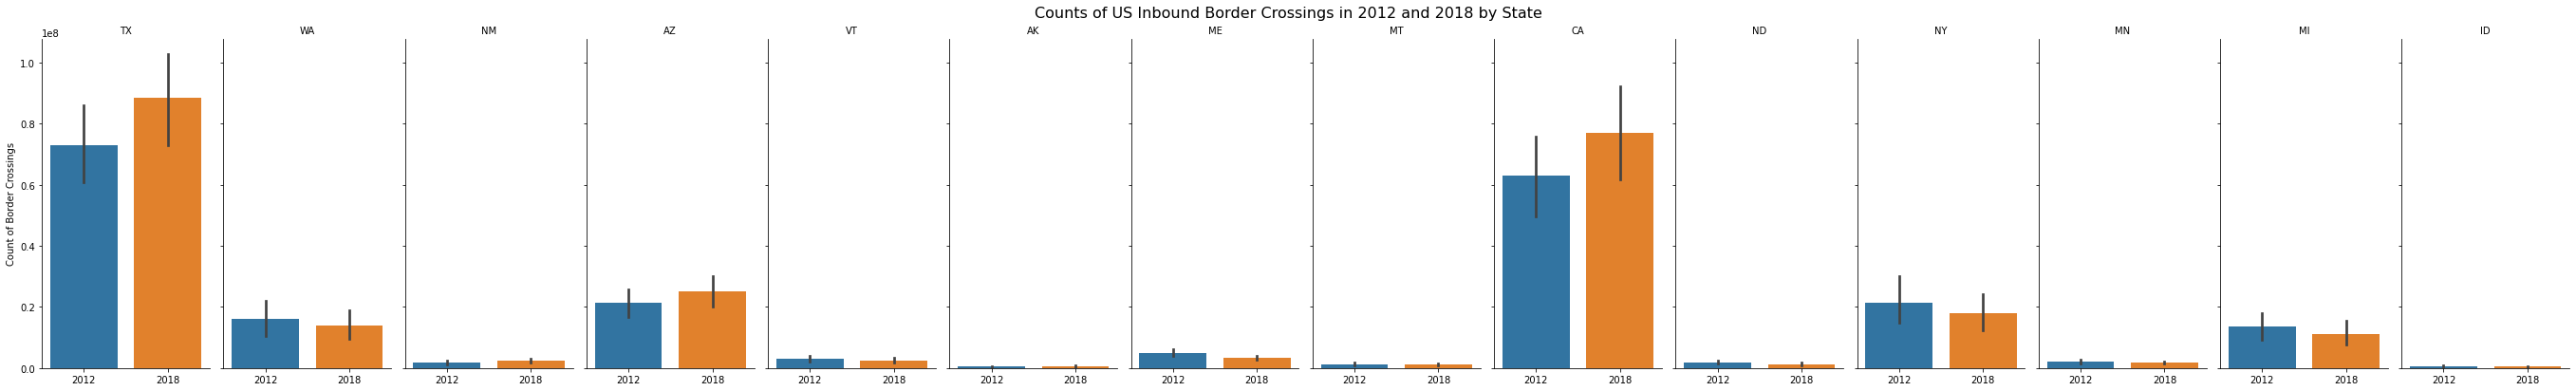

In [150]:
#To make this visualization, I'll take a slice from people_crossings that includes 2012 AND 2018:
crossings_2012_and_2018 = people_crossing[(people_crossing['year'] == 2012) | (people_crossing['year'] == 2018)]

plt.figure(figsize=(15,5))
stateplot1 = sns.catplot(x="year", y="value",
                 col="state_abbr",
                 data=crossings_2012_and_2018, estimator=sum,
                 kind="bar", height=6, aspect=.45)
(stateplot1.set_axis_labels("", "Count of Border Crossings")
  .set_xticklabels(['2012', '2018'])
  .set_titles("{col_name}"))

plt.subplots_adjust(top=0.9)
plt.suptitle('Counts of US Inbound Border Crossings in 2012 and 2018 by State', fontsize = 16)
sns.despine()
plt.show(stateplot1)

<Figure size 1080x360 with 0 Axes>

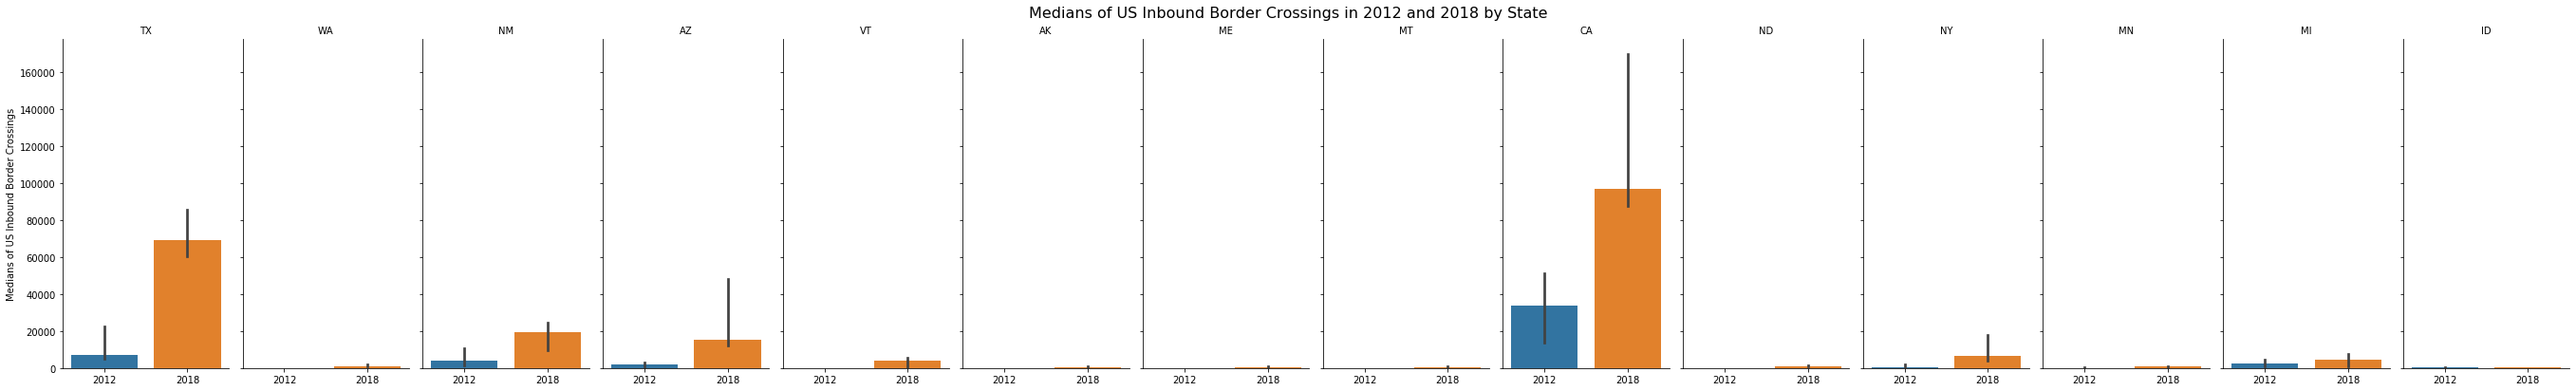

In [0]:
plt.figure(figsize=(15,5))
stateplot2 = sns.catplot(x="year", y="value",
                 col="state_abbr",
                 data=crossings_2012_and_2018, estimator=median,
                 kind="bar", height=6, aspect=.45)
(stateplot2.set_axis_labels("", "Medians of US Inbound Border Crossings")
  .set_xticklabels(['2012', '2018'])
  .set_titles("{col_name}"))
plt.subplots_adjust(top=0.9)
plt.suptitle('Medians of US Inbound Border Crossings in 2012 and 2018 by State', fontsize = 16)
sns.despine()
plt.show(stateplot2)

The catplots above better illustrate that the medians of all 4 states that border Mexico were **higher** in 2018 than they were in 2012, while the medians of 11 states that border Canada (as only 11 of 13 are included in this dataset) were also **higher** in 2018, despite seeing fewer overall crossings in 2018.

Now we'll move on to looking at the US-Mexico border specifically.

**Hypothesis 2:**

Ho: There is no significant difference in inbound US-Mexico border crossings between 2012 and 2018.

Ha: There is a significant difference in inbound US-Mexico border crossings from 2012 to 2018.

First, we'll test for a significant difference between Mexico's total crossings in 2012 vs. 2018. Then, we'll test differences in conveyance types between 2012 and 2018. Following that, we'll look within each year to see if there is a significant difference between conveyance types and, if so, which ones stand out.

We will not test differences between states here, since that was already done above. We already know, also, that Texas and California saw by far the most border crossings of the 4 states that border Mexico.

In [0]:
#First, we'll make 2 datasets from that just contain data from the US-Mexico border:
mexico_2012 = crossing_2012[(crossing_2012['border'] == 'US-Mexico Border')]
mexico_2018 = crossing_2018[(crossing_2018['border'] == 'US-Mexico Border')]

In [0]:
stats.mannwhitneyu(mexico_2012['value'], mexico_2018['value'])

MannwhitneyuResult(statistic=356198.0, pvalue=2.1220470548918775e-34)

In [0]:
#95% CI for median difference between US-Mexico border in 2012 vs. US-Mexico border in 2018:
print(ci95_mwu(mexico_2012['value'], mexico_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    1.590612e+08
median     7.053000e+03
std        2.746705e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    1.929137e+08
median     6.342400e+04
std        3.919661e+05
Name: value, dtype: float64
Difference between Medians: 
-56371.0
Difference between Standard Deviations: 
-117183.14704205439
Difference between Sums: 
-33852505
95% Confidence Interval: 
[[-56410.475334889445], [-56331.524665110555]]


There is a significant difference between Mexico's median number of border crossings into the US in 2012 vs the median number of crossings in 2018 (p < .001). We can reject the null hypothesis. 

At the 95% confidence level, the difference between medians falls between -56,410 and -56,332.

That is, the median amount of crossings at the US-Mexico border in 2012 is between 56,410 and 56,332 crossings lower than at the same border in 2018.

From the above statistics regarding specific states (and from the difference between sums shown in the above CI output), we can also conclude that the amount of border crossings at the US-Mexico border in 2018 was higher than in 2012.

In [0]:
#Now we'll look at conveyances types used at the US-Mexico border. 
#We'll test for differences between years first:
mex_2012_bus = mexico_2012[(mexico_2012['measure'] == 'Bus Passengers')]
mex_2012_peds = mexico_2012[(mexico_2012['measure'] == 'Pedestrians')]
mex_2012_train = mexico_2012[(mexico_2012['measure'] == 'Train Passengers')]
mex_2012_pvp = mexico_2012[(mexico_2012['measure'] == 'Personal Vehicle Passengers')]

#counts for conveyances in 2012:
print('Bus Passengers from Mexico, 2012: ', mex_2012_bus.value.sum()) 
print('Pedestrians from Mexico, 2012: ', mex_2012_peds.value.sum()) 
print('Train Passengers from Mexico, 2012: ', mex_2012_train.value.sum()) 
print('Personal Vehicle Passengers from Mexico, 2012: ', mex_2012_pvp.value.sum()) 

mex_2018_bus = mexico_2018[(mexico_2018['measure'] == 'Bus Passengers')]
mex_2018_peds = mexico_2018[(mexico_2018['measure'] == 'Pedestrians')]
mex_2018_train = mexico_2018[(mexico_2018['measure'] == 'Train Passengers')]
mex_2018_pvp = mexico_2018[(mexico_2018['measure'] == 'Personal Vehicle Passengers')]

#counts for conveyances in 2018:
print('Bus Passengers from Mexico, 2018: ', mex_2018_bus.value.sum()) 
print('Pedestrians from Mexico, 2018: ', mex_2018_peds.value.sum()) 
print('Train Passengers from Mexico, 2018: ', mex_2018_train.value.sum()) 
print('Personal Vehicle Passengers from Mexico, 2018: ', mex_2018_pvp.value.sum())

Bus Passengers from Mexico, 2012:  2866637
Pedestrians from Mexico, 2012:  41141640
Train Passengers from Mexico, 2012:  3319
Personal Vehicle Passengers from Mexico, 2012:  115049585
Bus Passengers from Mexico, 2018:  1838132
Pedestrians from Mexico, 2018:  46173881
Train Passengers from Mexico, 2018:  10436
Personal Vehicle Passengers from Mexico, 2018:  144891237


US-Mexico border crossings in 2012:  159061181
US-Mexico border crossings in 2018:  192913686


<Figure size 1080x360 with 0 Axes>

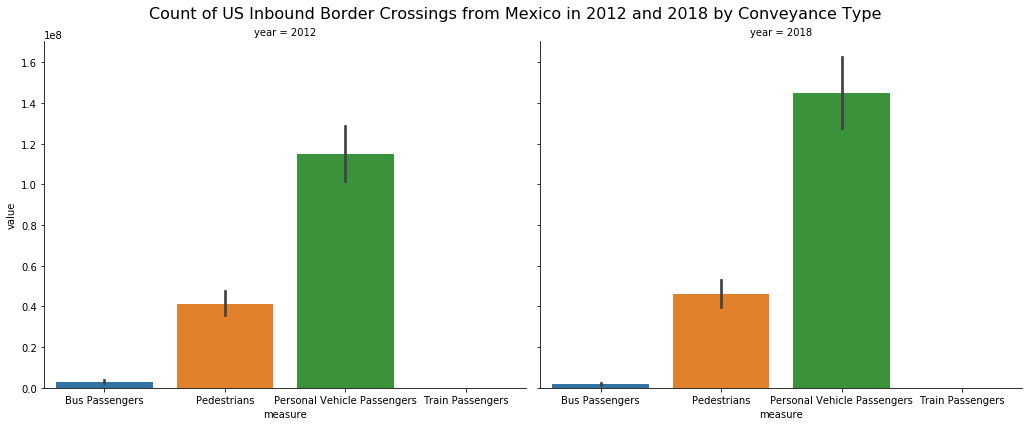

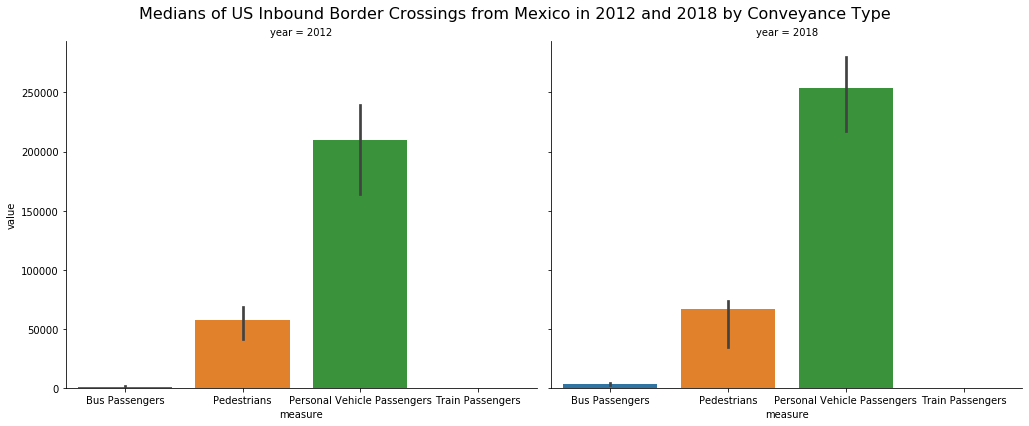

In [0]:
#For ease of viewing, I'm going to make a catplot showing conveyance types between 2012 & 2018:
mex_2012_and_2018 = people_crossing[(people_crossing['border'] == "US-Mexico Border") & ((people_crossing['year'] == 2012) | (people_crossing['year'] == 2018))]

print('US-Mexico border crossings in 2012: ', mexico_2012.value.sum()) 
print('US-Mexico border crossings in 2018: ', mexico_2018.value.sum())
#We can see that the number of crossings in 2018 was far higher than in 2012.

plt.figure(figsize=(15,5))      #making the catplot with medians
conveyplot1 = sns.catplot(x="measure", y="value",
                 col="year",
                 data=mex_2012_and_2018, estimator=sum,
                 kind="bar", height=6, aspect=1.2);
plt.subplots_adjust(top=0.9)
plt.suptitle('Count of US Inbound Border Crossings from Mexico in 2012 and 2018 by Conveyance Type', fontsize = 16)
plt.show(conveyplot1)

conveyplot2 = sns.catplot(x="measure", y="value",
                 col="year",
                 data=mex_2012_and_2018, estimator=median,
                 kind="bar", height=6, aspect=1.2);
plt.subplots_adjust(top=0.9)
plt.suptitle('Medians of US Inbound Border Crossings from Mexico in 2012 and 2018 by Conveyance Type', fontsize = 16)
plt.show(conveyplot2)                 

Both the raw counts and the medians of border crossings from Mexico were higher for all conveyance types in 2018 than they were in 2012 (except for buses, where we can see that fewer total bus crossings occurred in 2018).

--------
Rather than performing Mann Whitney U tests again on the conveyance types used to cross the US-Mexico border from 2012 to 2018, I will instead use the Kruskal-Wallis test as an ANOVA to see if there are significant differences between the 4 types of conveyances in 2012 and between the 4 types of conveyances in 2018. 

Supposing there are significant differences, I will use Dunn's test as a posthoc test, to see which conveyance types stand out significantly.

<Figure size 1080x360 with 0 Axes>

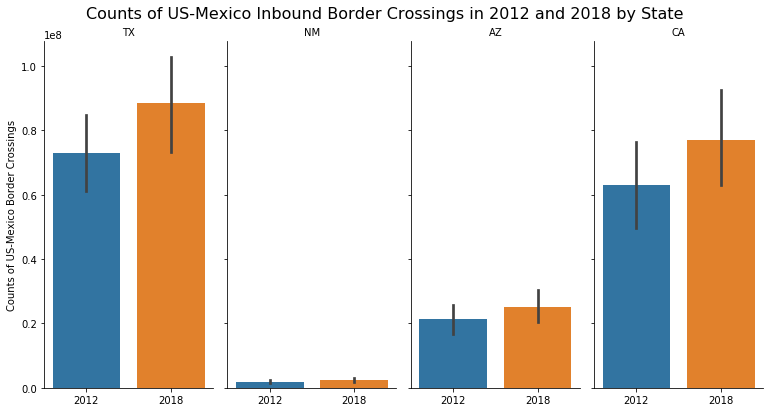

In [0]:
#Here's where I'm inserting my just Mexico stateplot, using mex_2012_and_2018:
plt.figure(figsize=(15,5))
stateplot_mex = sns.catplot(x="year", y="value",
                 col="state_abbr",
                 data=mex_2012_and_2018, estimator=sum,
                 kind="bar", height=6, aspect=.45)
(stateplot_mex.set_axis_labels("", "Counts of US-Mexico Border Crossings")
  .set_xticklabels(['2012', '2018'])
  .set_titles("{col_name}"))  
plt.subplots_adjust(top=0.9)
plt.suptitle('Counts of US-Mexico Inbound Border Crossings in 2012 and 2018 by State', fontsize = 16)
sns.despine()
plt.show(stateplot_mex)

In [0]:
#Conducting a Kruskal-Wallis test to test for differences between 2012 conveyances:
stats.kruskal(
    mex_2012_bus['value'],
    mex_2012_peds['value'],
    mex_2012_train['value'],
    mex_2012_pvp['value']
)

KruskalResult(statistic=890.186209604612, pvalue=1.1903870497595827e-192)

There is a significant difference between the medians of conveyance types used to cross the US-Mexico border in 2012 (p < .001). We can reject the null hypothesis.

In [0]:
#Now runnng Dunn's test as a posthoc measure:
dunn_mex_2012 = [
    mex_2012_bus['value'],
    mex_2012_peds['value'],
    mex_2012_train['value'],
    mex_2012_pvp['value']
]
sp.posthoc_dunn(dunn_mex_2012)

,1,2,3,4
1,-1.000000e+00,5.277264e-36,9.847385e-18,6.618437e-76
2,5.277264e-36,-1.000000e+00,7.424244e-99,3.430052e-09
3,9.847385e-18,7.424244e-99,-1.000000e+00,1.044758e-160
4,6.618437e-76,3.430052e-09,1.044758e-160,-1.000000e+00


All conveyance types used to cross the US-Mexico border in 2012 are significantly different from each other (p < .001 in all cases).

In [0]:
#Kruskal-Wallis test for 2018 conveyances:
stats.kruskal(
    mex_2018_bus['value'],
    mex_2018_peds['value'],
    mex_2018_train['value'],
    mex_2018_pvp['value']
)

KruskalResult(statistic=471.82485914526995, pvalue=6.085295098374925e-102)

There is a significant difference between the medians of conveyance types used to cross the US-Mexico border in 2018 (p < .001). We can reject the null hypothesis.

In [0]:
#Now running Dunn's test as a posthoc measure:
dunn_mex_2018 = [
    mex_2018_bus['value'],
    mex_2018_peds['value'],
    mex_2018_train['value'],
    mex_2018_pvp['value']
]
sp.posthoc_dunn(dunn_mex_2018)

,1,2,3,4
1,-1.000000e+00,1.343152e-28,9.958620e-04,3.029796e-80
2,1.343152e-28,-1.000000e+00,2.902217e-23,4.053529e-20
3,9.958620e-04,2.902217e-23,-1.000000e+00,1.641639e-48
4,3.029796e-80,4.053529e-20,1.641639e-48,-1.000000e+00


All conveyance types used to cross the US-Mexico border in 2018 are significantly different from each other (p < .001 in all cases).

Now we will move on to the third hypothesis:

**Hypothesis 3:**

Ho: There is no significant difference in inbound US-Canada border crossings from 2012 to 2018.

Ha: There is a significant difference in inbound US-Canada border crossings from 2012 to 2018.

First, we'll test for a significant difference between Canada's total crossings in 2012 vs. 2018. Then, we'll look within each year to see if there is a significant difference between conveyance types and, if so, which ones stand out.

We will not test differences between states here, since that was already done above. 

In [0]:
#First, we'll make 2 datasets from that just contain data from the US-Canada border:
canada_2012 = crossing_2012[(crossing_2012['border'] == 'US-Canada Border')]
canada_2018 = crossing_2018[(crossing_2018['border'] == 'US-Canada Border')]

In [0]:
stats.mannwhitneyu(canada_2012['value'], canada_2018['value'])

MannwhitneyuResult(statistic=2522207.5, pvalue=2.856800490714359e-179)

In [0]:
#95% CI for median difference between crossings at the US-Canada border in 2012 vs. in 2018:
print(ci95_mwu(canada_2012['value'], canada_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    6.513770e+07
median     2.500000e+01
std        8.598197e+04
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    5.403224e+07
median     9.760000e+02
std        9.920656e+04
Name: value, dtype: float64
Difference between Medians: 
-951.0
Difference between Standard Deviations: 
-13212.336780214056
Difference between Sums: 
11105464
95% Confidence Interval: 
[[-958.7708290008036], [-943.2291709991964]]


There is a significant difference between Canada's median number of border crossings into the US in 2012 vs the median number of crossings in 2018 (p < .001). We can reject the null hypothesis. 

At the 95% confidence level, the median difference between the US-Canada border in 2012 and in 2018 falls between -959 and -943.

That is, the median amount of crossings at the US-Canada border in 2012 is 959 to 943 crossings lower than in 2018.

From the above statistics regarding specific states (and from the difference between sums shown in the CI output), we can also conclude that the total amount of border crossings in 2018 was lower than in 2012, even though the median happens to be higher in 2012.

In [0]:
#Now we'll look at conveyances types used at the US-Canada border. 
#We'll test for differences between years first:
can_2012_bus = canada_2012[(canada_2012['measure'] == 'Bus Passengers')]
can_2012_peds = canada_2012[(canada_2012['measure'] == 'Pedestrians')]
can_2012_train = canada_2012[(canada_2012['measure'] == 'Train Passengers')]
can_2012_pvp = canada_2012[(canada_2012['measure'] == 'Personal Vehicle Passengers')]

#counts for conveyances in 2012:
print('Bus Passengers from Canada, 2012: ', can_2012_bus.value.sum()) 
print('Pedestrians from Canada, 2012: ', can_2012_peds.value.sum()) 
print('Train Passengers from Canada, 2012: ', can_2012_train.value.sum()) 
print('Personal Vehicle Passengers from Canada, 2012: ', can_2012_pvp.value.sum()) 

can_2018_bus = canada_2018[(canada_2018['measure'] == 'Bus Passengers')]
can_2018_peds = canada_2018[(canada_2018['measure'] == 'Pedestrians')]
can_2018_train = canada_2018[(canada_2018['measure'] == 'Train Passengers')]
can_2018_pvp = canada_2018[(canada_2018['measure'] == 'Personal Vehicle Passengers')]

#counts for conveyances in 2018:
print('Bus Passengers from Canada, 2018: ', can_2018_bus.value.sum()) 
print('Pedestrians from Canada, 2018: ', can_2018_peds.value.sum()) 
print('Train Passengers from Canada, 2018: ', can_2018_train.value.sum()) 
print('Personal Vehicle Passengers from Canada, 2018: ', can_2018_pvp.value.sum())

Bus Passengers from Canada, 2012:  2435608
Pedestrians from Canada, 2012:  424870
Train Passengers from Canada, 2012:  269048
Personal Vehicle Passengers from Canada, 2012:  62008178
Bus Passengers from Canada, 2018:  1795768
Pedestrians from Canada, 2018:  486290
Train Passengers from Canada, 2018:  289317
Personal Vehicle Passengers from Canada, 2018:  51460865


US-Canada border crossings in 2012:  65137704
US-Canada border crossings in 2018:  54032240


<Figure size 1080x360 with 0 Axes>

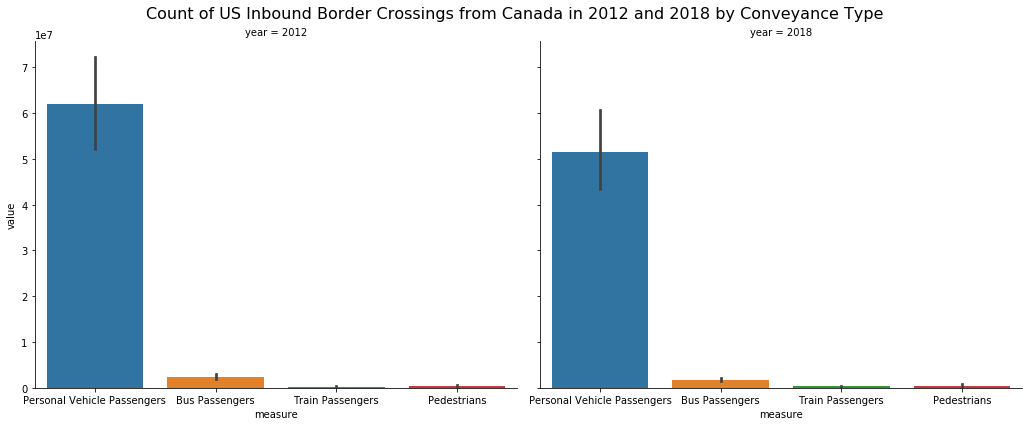

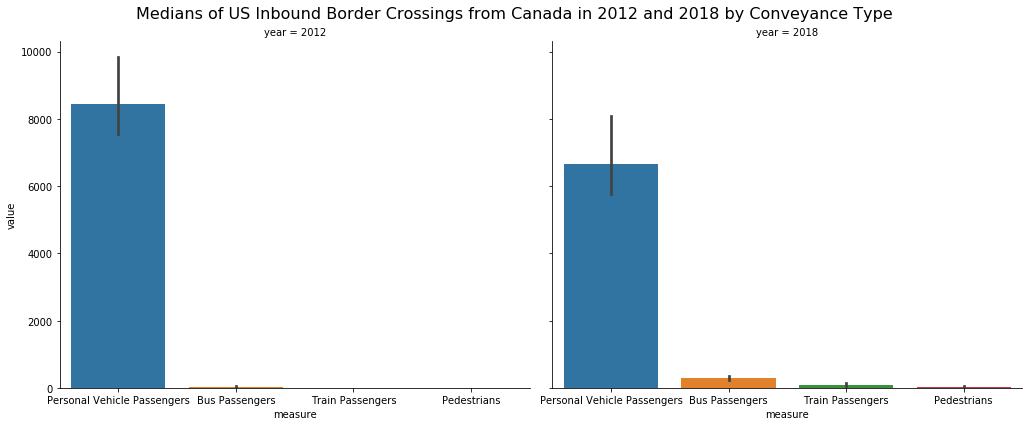

In [0]:
#Again for ease of viewing, I'm going to make a catplot showing conveyance types between 2012 & 2018:
can_2012_and_2018 = people_crossing[(people_crossing['border'] == "US-Canada Border") & ((people_crossing['year'] == 2012) | (people_crossing['year'] == 2018))]

# count_can_2012 = can_2012_and_2018[(can_2012_and_2018['year'] == 2012)]
# print('US-CA border crossings 2012: ', count_can_2012.value.sum())

#Getting counts for Canadian border crossings:
print('US-Canada border crossings in 2012: ', canada_2012.value.sum()) 
print('US-Canada border crossings in 2018: ', canada_2018.value.sum())
#We can see that the number of crossings in 2018 was lower than in 2012.

#Making the catplot with the count of all crossings:
plt.figure(figsize=(15,5))      
conveyplot2 = sns.catplot(x="measure", y="value",
                 col="year",
                 data=can_2012_and_2018, estimator=sum,
                 kind="bar", height=6, aspect=1.2);
plt.subplots_adjust(top=0.9)
plt.suptitle('Count of US Inbound Border Crossings from Canada in 2012 and 2018 by Conveyance Type', fontsize = 16)
plt.show(conveyplot2)

#Now making the catplot with the medians of crossings:
conveyplot3 = sns.catplot(x="measure", y="value",
                 col="year",
                 data=can_2012_and_2018, estimator=median,
                 kind="bar", height=6, aspect=1.2);
plt.subplots_adjust(top=0.9)
plt.suptitle('Medians of US Inbound Border Crossings from Canada in 2012 and 2018 by Conveyance Type', fontsize = 16)
plt.show(conveyplot3)                 

As the above catplots show, when we look at US-Canada border crossings by conveyance type, the raw counts of crossings for Personal Vehicle Passengers and Bus Passengers were lower in 2018 than in 2012. The difference in raw counts among pedestrian crossings and train crossings in negligible.

The medians for 3 out of 4 conveyance types were higher, however, in 2018. The median for Personal Vehicle Passengers, which is by far the most common conveyance type, was lower in 2018.

<Figure size 1080x360 with 0 Axes>

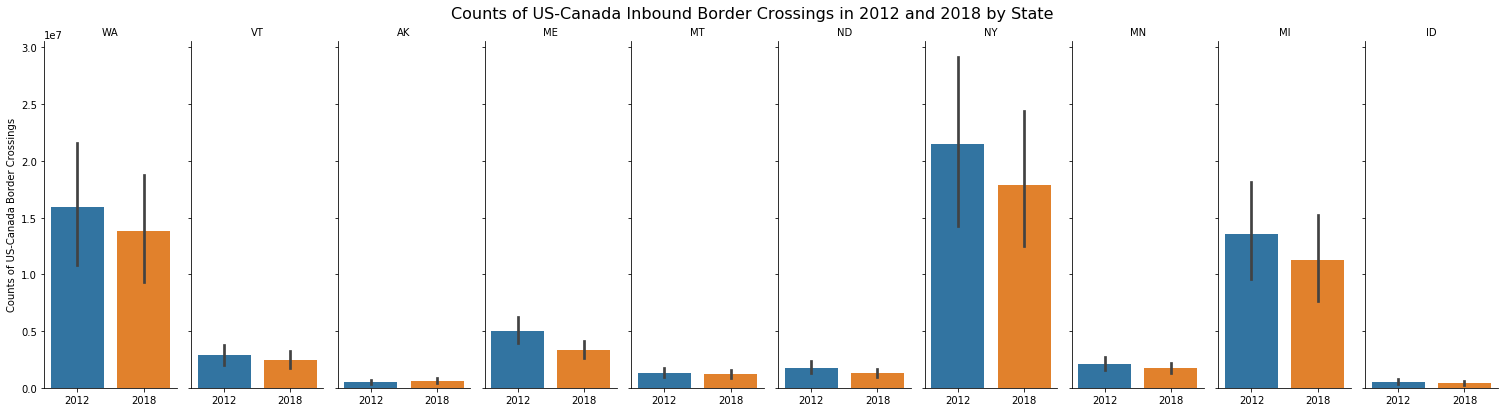

In [0]:
#(Also, here's where I'm inserting my just Canada stateplot, for ease of viewing in the presentation:
plt.figure(figsize=(15,5))
stateplot_can = sns.catplot(x="year", y="value",
                 col="state_abbr",
                 data=can_2012_and_2018, estimator=sum,
                 kind="bar", height=6, aspect=.35)
(stateplot_can.set_axis_labels("", "Counts of US-Canada Border Crossings")
  .set_xticklabels(['2012', '2018'])
  .set_titles("{col_name}"))  
plt.subplots_adjust(top=0.9)
plt.suptitle('Counts of US-Canada Inbound Border Crossings in 2012 and 2018 by State', fontsize = 16)
sns.despine()
plt.show(stateplot_can)

Again, as with Mexico, rather than performing Mann Whitney U tests a second time on the conveyance types used to cross the US-Canada border from 2012 to 2018, I will instead use the Kruskal-Wallis test as an ANOVA to see if there are significant differences between the 4 types of conveyances in 2012 and between the 4 types of conveyances in 2018.

Supposing there are significant differences, I will use Dunn's test as a posthoc test, to see which conveyance types stand out significantly.

In [0]:
#Testing differences between conveyances types coming from Canada in 2012:
stats.kruskal(
    can_2012_bus['value'],
    can_2012_peds['value'],
    can_2012_train['value'],
    can_2012_pvp['value']
)

KruskalResult(statistic=2168.4512291757483, pvalue=0.0)

There is a significant difference between the medians of conveyance types used to cross the US-Canada border in 2012 (p = 0). We can reject the null hypothesis.

In [0]:
#Now using Dunn's test to see which stand out:
dunn_can_2012 = [
    can_2012_bus['value'],
    can_2012_peds['value'],
    can_2012_train['value'],
    can_2012_pvp['value']
]
sp.posthoc_dunn(dunn_can_2012)

,1,2,3,4
1,-1.000000e+00,3.662336e-19,6.430474e-28,4.827697e-200
2,3.662336e-19,-1.000000e+00,4.482867e-02,0.000000e+00
3,6.430474e-28,4.482867e-02,-1.000000e+00,0.000000e+00
4,4.827697e-200,0.000000e+00,0.000000e+00,-1.000000e+00


The medians of all conveyance types coming from Canada in 2012 are significantly different from each other. We can reject the null hypothesis.

In [0]:
#Now testing differences between conveyance types coming from Canada in 2018:
stats.kruskal(
    can_2018_bus['value'],
    can_2018_peds['value'],
    can_2018_train['value'],
    can_2018_pvp['value']
)

KruskalResult(statistic=1092.6853823896095, pvalue=1.4059456292647262e-236)

There is a significant difference between the medians of conveyance types used to cross the US-Canada border in 2018 (p = 0). We can reject the null hypothesis.

In [0]:
#Now we'll use the posthoc Dunn to see which conveyances types stand out:
dunn_can_2018 = [
    can_2018_bus['value'],
    can_2018_peds['value'],
    can_2018_train['value'],
    can_2018_pvp['value']        
]
sp.posthoc_dunn(dunn_can_2018)

,1,2,3,4
1,-1.000000e+00,1.169371e-19,2.124598e-05,6.553631e-92
2,1.169371e-19,-1.000000e+00,1.794536e-04,1.012014e-175
3,2.124598e-05,1.794536e-04,-1.000000e+00,6.909685e-96
4,6.553631e-92,1.012014e-175,6.909685e-96,-1.000000e+00


The medians of all conveyance types coming into the US from Canada in 2018 are significantly different from each other. We can reject the null hypothesis.

Now we need to determine if there are any significant differences between Mexico and Canada, for both 2012 and 2018. 

**Hypothesis 4:**

Ho: There is no significant difference in inbound US border crossings between the US-Mexico and US-Canada borders.

Ha: There is a significant difference in inbound US border crossings between the US-Mexico and US-Canada borders.

In [0]:
#First, a Mann Whitney U between Canadian and Mexican borders in 2012:
stats.mannwhitneyu(mexico_2012['value'], canada_2012['value'])

MannwhitneyuResult(statistic=1547258.5, pvalue=2.5258241970696723e-90)

In [0]:
#95% CI for median difference between Canadian & Mexican borders in 2012:
print(ci95_mwu(mexico_2012['value'], canada_2012['value']))

Dataframe 1 Aggregated Stats:
col_sum    1.590612e+08
median     7.053000e+03
std        2.746705e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    6.513770e+07
median     2.500000e+01
std        8.598197e+04
Name: value, dtype: float64
Difference between Medians: 
7028.0
Difference between Standard Deviations: 
188584.5980955729
Difference between Sums: 
93923477
95% Confidence Interval: 
[[7066.139518958874], [6989.860481041126]]


There is a significant difference betweeen the median amount of crossings at the US-Mexico and US-Canada borders in 2012 (p < .001). We can reject the null hypothesis.

At the 95% confidence level, the difference between medians falls between 7066 and 6990.

That is, the median amount of crossings at the US-Mexico border in 2012 is between 7066 to 6990 crossings higher than at the US-Canada border in 2012.

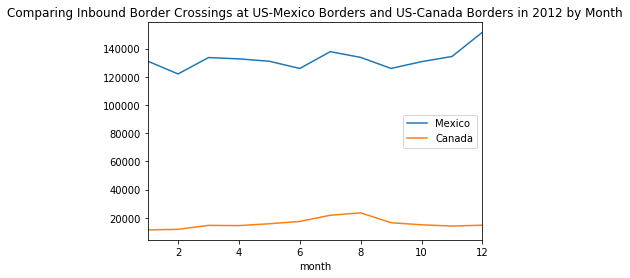

In [0]:
#Let's plot the difference between frequencies at each border, grouping by month of the year:
lineplot = people_crossing[(people_crossing.border == 'US-Mexico Border') & (people_crossing.year == 2012)][
    ['month', 'value']].groupby('month').mean().plot()
people_crossing[(people_crossing.border == 'US-Canada Border') & (people_crossing.year == 2012)][
    ['month', 'value']].groupby('month').mean().plot(ax=lineplot)
plt.legend(['Mexico', 'Canada'])
plt.title('Comparing Inbound Border Crossings at US-Mexico Borders and US-Canada Borders in 2012 by Month')
plt.show()   

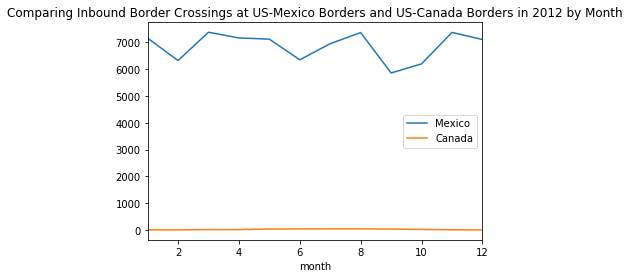

25.0
7053.0


In [0]:
#And here, we'll plot it again using medians, since 'value' is non-normally distributed & highly skewed:
lineplot1 = people_crossing[(people_crossing.border == 'US-Mexico Border') & (people_crossing.year == 2012)][
    ['month', 'value']].groupby('month').median().plot()
people_crossing[(people_crossing.border == 'US-Canada Border') & (people_crossing.year == 2012)][
    ['month', 'value']].groupby('month').median().plot(ax=lineplot1)
plt.legend(['Mexico', 'Canada'])
plt.title('Comparing Inbound Border Crossings at US-Mexico Borders and US-Canada Borders in 2012 by Month')
plt.show()                
#Canada's median number of crossings for 2012 is in fact only 25:
print(canada_2012.value.median())
print(mexico_2012.value.median())

In [0]:
#Now we'll test Canada's and Mexico's crossings in 2018:
stats.mannwhitneyu(mexico_2018['value'], canada_2018['value'])

MannwhitneyuResult(statistic=391910.5, pvalue=1.8609690957587394e-139)

In [0]:
#95% CI for US-Mexico border in 2018 vs. US-Canada border in 2018:
print(ci95_mwu(mexico_2018['value'], canada_2018['value']))

Dataframe 1 Aggregated Stats:
col_sum    1.929137e+08
median     6.342400e+04
std        3.919661e+05
Name: value, dtype: float64


Dataframe 2 Aggregated Stats:
col_sum    5.403224e+07
median     9.760000e+02
std        9.920656e+04
Name: value, dtype: float64
Difference between Medians: 
62448.0
Difference between Standard Deviations: 
292555.40835741325
Difference between Sums: 
138881446
95% Confidence Interval: 
[[62496.65663690923], [62399.34336309077]]


There is a significant difference between the median amount of crossings at the US-Mexico and US-Canada borders in 2018 (p < .001). We can reject the null hypothesis again.

At the 95% confidence level, the difference between medians falls between 62,497 and 62,399.

That is, the median amount of crossings at the US-Mexico border in 2018 was between 62,497 and 62,399 crossings **higher** than at the US-Canada border in that same year.

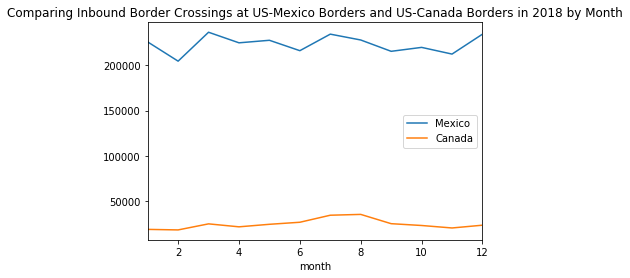

In [0]:
#We'll plot the means now for each border in 2018, by month:
lineplot2 = people_crossing[(people_crossing.border == 'US-Mexico Border') & (people_crossing.year == 2018)][
    ['month', 'value']].groupby('month').mean().plot()
people_crossing[(people_crossing.border == 'US-Canada Border') & (people_crossing.year == 2018)][
    ['month', 'value']].groupby('month').mean().plot(ax=lineplot2)
plt.legend(['Mexico', 'Canada'])
plt.title('Comparing Inbound Border Crossings at US-Mexico Borders and US-Canada Borders in 2018 by Month')
plt.show()   
#So there are only 3 months here, because this dataset stops in March.

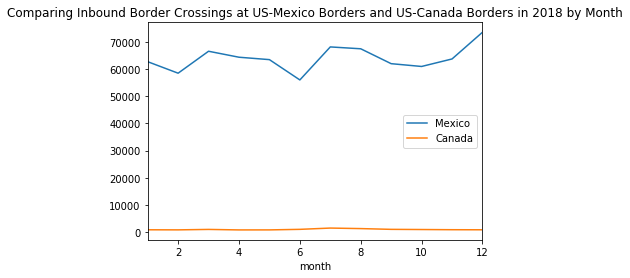

976.0
63424.0


In [0]:
#Now again, with medians:
lineplot3 = people_crossing[(people_crossing.border == 'US-Mexico Border') & (people_crossing.year == 2018)][
    ['month', 'value']].groupby('month').median().plot()
people_crossing[(people_crossing.border == 'US-Canada Border') & (people_crossing.year == 2018)][
    ['month', 'value']].groupby('month').median().plot(ax=lineplot3)
plt.legend(['Mexico', 'Canada'])
plt.title('Comparing Inbound Border Crossings at US-Mexico Borders and US-Canada Borders in 2018 by Month')
plt.show()  
print(canada_2018.value.median())
print(mexico_2018.value.median())
#Again, Mexico's amount of crossings was far higher. 
#However, it's also noteworthy that Canada's median is a lot higher than it was in 2012.

It's clear from the above visualizations of the border crossing rate by month that the US-Mexico border sees far more crossings on average than does the US-Canada border, no matter which month of the year it is.

#C. Results

**Hypothesis 1**

To recap the statistical tests conducted, I first found that the 'value' variable - i.e., the numerical amount of border crossings - in this dataset is non-normally distributed. For this reason, I used a Mann Whitney U test to determine that there was a significant difference between the medians of overall inbound US border crossings from 2012 to 2018 (Hypothesis 1). Based on a p-value < .001, the null hypothesis was rejected.
 

From there, I used Mann Whitney U tests to check for differences between each of the conveyance types from 2012 to 2018. Based on a p-value < .001, there was a significant difference between the median amounts of bus crossings from 2012 to 2018. Based on a p-value < .001, there was a significant difference between the median amounts of pedestrian crossings from 2012 to 2018. Based on a p-value < .001, there was a significant difference between median amounts of train crossings from 2012 to 2018. The null hypothesis was rejected in each of these three tests. However, based on a p-value of 0.16, there was not a significant difference between the median amounts of personal vehicle crossings from 2012 to 2018. The null hypothesis here failed to be rejected.
 

Next, I tested for differences between the median amounts of crossings into each border state in the dataset, from 2012 to 2018, using Mann Whitney U tests again, as all data was non-normal. 

Briefly, the results of these tests were as follows:

Alaska: Rejected null hypothesis (p < .001)


Arizona: Rejected null hypothesis (p < .001)


California: Rejected null hypothesis (p < .001)


Idaho: Failed to reject null hypothesis (p = .237)


Maine: Rejected null hypothesis (p < .001)


Michigan: Rejected null hypothesis (p < .05)


Minnesota: Rejected null hypothesis (p < .001)


Montana: Rejected null hypothesis (p < .001)


New Mexico: Rejected null hypothesis (p < .001)


New York: Rejected null hypothesis (p < .001)


North Dakota: Rejected null hypothesis (p < .001)


Texas: Rejected null hypothesis (p < .001)


Vermont: Rejected null hypothesis (p < .001)


Washington: Rejected null hypothesis (p < .001)


The median amounts of crossings for all border states except Idaho were significantly different from 2012 to 2018. Moreover, upon looking at the total number of crossings (using value.sum()) for each state in 2012 and again in 2018, it became evident that every state that borders Mexico experienced an increase in border crossings from 2012 to 2018, while every state in the dataset that borders Canada saw a decrease in border crossings from 2012 to 2018. Even the state (Idaho) where no significant difference in medians was found between the two years, the raw number of people who crossed the US-Canada border there was still lower in 2018 than it was in 2012.


**Hypothesis 2**

Regarding Hypothesis 2, I used a Mann Whitney U test to determine that there was a significant difference between Mexico’s median number of border crossings into the US from 2012 to 2018 (p < .001). The null hypothesis was rejected here.
 
Then I looked for potential differences between types of conveyances used to cross the US-Mexico border in 2012 and in 2018. Rather than conducting tests on significant differences between conveyance types from 2012 to 2018 a second time, I decided to look within 2012 and within 2018 to see if any conveyance types were significantly different from each other, in each year. First, I used the Kruskal-Wallis test as an ANOVA for the 2012 conveyances and, based on a p-value < .001, found that there was at least one significant difference between the medians. The null hypothesis was rejected. Upon completing a post-hoc Dunn’s test, I found that the medians of each type of conveyance used were all significantly different from each other (p < .001 in all cases.)
 
I used the same protocol for conveyances used in 2018 at the US-Mexico border and found, based on a p-value < .001, that there was at least one significant difference between the median amounts of conveyance types used in 2018. The null hypothesis was rejected. When I ran the post-hoc Dunn’s test, I found once again that the medians of each type of conveyance were all significantly difference from each other (p < .001 in all cases).
 
**Hypothesis 3**

I followed the same plan for testing for significant differences within the data that came solely from the US-Canada border – Hypothesis 3. First, through a Mann Whitney U test, I found that there was a significant difference between US-Canada border crossings from 2012 to 2018 (p < .001). Then, upon using Dunn's test to look at each type of conveyance used to cross the US-Canada border, I encountered much the same results as I did with Mexico’s conveyances – in 2012, the medians of each type of conveyance were all significantly different from each other (p < .001 in all cases except for that between pedestrians and train passengers, where p < .05). Similarly, in 2018, the medians of each type of conveyance were all significantly different from each other (p < .001 in all comparisons). The null hypothesis was rejected for each of the above tests.

**Hypothesis 4**

Finally, regarding Hypothesis 4, I tested for differences between the US-Mexico border and the US-Canada border. I used a Mann Whitney U test to determine that there was a significant difference between the amount of crossings at the US-Mexico border vs. at the US-Canada border in 2012 (p < .001). Similarly, I used a Mann Whitney U test to determine that there was a significant difference between the amount of crossings at the US-Mexico border vs. at the US-Canada border in 2018 (p < .001). The null hypothesis was rejected in both of these tests.
 
Upon plotting the frequencies of crossings at each border (by month of the year), it was evident that, no matter the month, the US-Mexico border had a far greater amount of border crossings than the US-Canada border. In fact, Canada’s median amount of crossings in both 2012 and 2018 was less than 1,000, while Mexico’s was 7,053 in 2012 and 63,424 in 2018.
 

#D. Discussion & Recommendations

**Discussion**

A few interesting findings came out of this analysis.

**1. There was a massive increase in the median amount of inbound border crossings at the US-Mexican border from 2012 to 2018.**

More research is needed to figure out what may have caused this dramatic increase in crossings. (We must keep in mind that this dataset represents only ***legal*** crossings into the US. Unauthorized crossings are at an all-time [high](https://www.pewresearch.org/fact-tank/2019/11/01/whats-happening-at-the-u-s-mexico-border-in-5-charts/) for the decade as well.) 

Perhaps this phenomenon is a response to the perceived tightening of regulations and surveillance at the US-Mexico border, as travelers and immigrants alike try to enter the US before it becomes even more difficult.

However, other factors may be at play, which we can't see from this dataset alone. As a next step, it may be useful to look at other border crossings datasets, which may have more variables that could be analyzed.

**2. There was a substantial decrease in the median amount of inbound border crossings at the US-Canada border from 2012 to 2018.**

It's interesting that the US-Canada border is experiencing the opposite phenomenon as the US-Mexico border. Again, perhaps this could be explained by the Trump administration's [unfriendly](https://www.thestar.com/news/world/2018/06/26/justin-whats-your-problem-justin-trump-complains-about-trudeau-and-canada-threatens-auto-tariff.html) rhetoric and/or what many see as dangerous conditions (the prevalence of shootings, hate crimes, etc.). These circumstances could make Canadians more wary of visiting the US; however, more research is needed to make any sort of determination about reason for the decrease in US border crossings from Canada.

The key difference here between the Mexican and Canadian borders is that Mexico can be classified as a [developing country](http://worldpopulationreview.com/countries/developing-countries/), while Canada is classified as a developed country. For Canadians, visiting the US may be thought of as a leisure activity, and few people (less than [2%](https://www.migrationpolicy.org/article/canadian-immigrants-united-states) of immigrants to the US) immigrate from Canada to the US. On the other hand, immigrants from Mexico amount to about [25%](https://www.pewresearch.org/fact-tank/2019/06/17/key-findings-about-u-s-immigrants/) of all immigrants to the US. People from Mexico may visit the US for leisure purposes less often than Canadians, and they may see emigration as a way to increase their [standard of living](https://www.jstor.org/stable/10.7249/mg985rc.15?seq=1#metadata_info_tab_contents) or have the potential to earn more money. These differences between Canada and Mexico may contribute to the opposite responses these countries seem to be having with regard to social upheaval in the US, but without more research and more informative datasets, this is supposition. 

**3. Significantly more border crossings take place at the US-Mexico border than the US-Canada border.**

Regarding this point, we must take into account that Canada is the only country north of the US, while Mexico is *not* the only country south of the US. Thousands of people immigrate to the US - by way of the US-Mexico border - from Central American countries such as Guatemala or Nicaragua, many of which are also classified as developing countries. 

Furthermore, Canada's population is relatively small (roughly 37.6 million as of 2019), while Mexico has a greater population (about 125.3 million in 2018).

Both of these facts could certainly contribute to the much greater rate of border crossings at the US-Mexico border.

**4. Border crossings - from both Canada and Mexico - in personal vehicles are significantly more numerous than crossings in other types of conveyances (bus, train, and on foot).**

This is a more simple finding, but it tells us how the majority of people choose to cross US borders.

**Recommendations**

1. Find and analyze other datasets to gain more information about US border crossings. Perhaps there are datasets that include information about the number of people crossing together, group composition (family group, friend group, etc.), or the reason for border crossings (immigration, work-related, tourism, etc.).

2. Another next step might be for some independent person or institution (perhaps university-affiliated sociologists, for example) to conduct a large-scale research project on reasons for crossing US borders. More qualitative information may be necessary to determine why crossings from Canada and Mexico look so different from each other, as well as if/how current US politics have affected US border crossing. 